### Import Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

In [2]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [4]:
# To supress numerical display in scientific notations - only two decimasl for float datatypes
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [5]:
# Avoid displaying warnings
import warnings

In [6]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

In [7]:
# loading the dataset
df = pd.read_csv("shopping_trends_updated.csv")

<IPython.core.display.Javascript object>

In [8]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

There are 3900 rows and 18 columns in the dataset


<IPython.core.display.Javascript object>

In [9]:
df.head(2)

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   

   Location Size   Color  Season  Review Rating Subscription Status  \
0  Kentucky    L    Gray  Winter           3.10                 Yes   
1     Maine    L  Maroon  Winter           3.10                 Yes   

  Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0       Express              Yes             Yes                  14   
1       Express              Yes             Yes                   2   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly

<IPython.core.display.Javascript object>

In [10]:
# to view last 5 rows of the dataset
df.tail(2)

Customer ID  Age  Gender Item Purchased     Category  \
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)    Location Size  Color  Season  Review Rating  \
3898                     77   Minnesota    S  Brown  Summer           3.80   
3899                     81  California    M  Beige  Spring           3.10   

     Subscription Status Shipping Type Discount Applied Promo Code Used  \
3898                  No       Express               No              No   
3899                  No  Store Pickup               No              No   

      Previous Purchases Payment Method Frequency of Purchases  
3898                  24          Venmo                 Weekly  
3899                  33          Venmo              Quarterly

<IPython.core.display.Javascript object>

In [11]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

<IPython.core.display.Javascript object>

In [12]:
# checking the names of the columns in the data
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


<IPython.core.display.Javascript object>

In [13]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

<IPython.core.display.Javascript object>

* `Age`, `Purchase Amount (USD)`, `Previous Purchases` are of *integer* type.

* `Review Rating` is of *float* type.

* All other columns are *object* type.

### Fixing the data types

* The columns that are *object* type we can change them to categories.

* *Coverting objects to category reduces the data space required to store the dataframe*

In [14]:
data["Gender"] = data["Gender"].astype("category")
data["Item Purchased"] = data["Item Purchased"].astype("category")
data["Category"] = data["Category"].astype("category")
data["Location"] = data["Location"].astype("category")
data["Size"] = data["Size"].astype("category")
data["Color"] = data["Color"].astype("category")
data["Season"] = data["Season"].astype("category")
data["Subscription Status"] = data["Subscription Status"].astype("category")
data["Payment Method"] = data["Payment Method"].astype("category")
data["Shipping Type"] = data["Shipping Type"].astype("category")
data["Discount Applied"] = data["Discount Applied"].astype("category")
data["Promo Code Used"] = data["Promo Code Used"].astype("category")
data["Frequency of Purchases"] = data["Frequency of Purchases"].astype("category")

<IPython.core.display.Javascript object>

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   category
 3   Item Purchased          3900 non-null   category
 4   Category                3900 non-null   category
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   category
 7   Size                    3900 non-null   category
 8   Color                   3900 non-null   category
 9   Season                  3900 non-null   category
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   category
 12  Shipping Type           3900 non-null   category
 13  Discount Applied        3900 non-null   category
 14  Promo Code Used         

<IPython.core.display.Javascript object>

* We can see that the memory usage has decreased by 50%

### Creating new columns for better analysis and visualization

* We will create a new column out of the `Age` column.

* This new column will be of a categorical data type by dividing the column in generations. EX. Millenials, Baby Boomers, GenZ.

* This is done taking in account the current year is 2023

In [16]:
conditions = [
    (data["Age"] >= 59),
    (data["Age"] >= 43) & (data["Age"] <= 58),
    (data["Age"] >= 27) & (data["Age"] <= 42),
    (data["Age"] >= 11) & (data["Age"] <= 26),
]

values = [
    "59-77 - Baby Booomers",
    "43-58 - GenX",
    "27-42 - Millenialls",
    "11-26 - GenZ",
]

<IPython.core.display.Javascript object>

In [17]:
# create new column age_group
data["age_group"] = np.select(conditions, values)

<IPython.core.display.Javascript object>

In [18]:
data.to_csv("consumer_trends_generations.csv", index=False)
# df.to_csv('file_name.csv', index=False)

<IPython.core.display.Javascript object>

In [19]:
# change data type from object to category to save up in memory
data["age_group"] = data["age_group"].astype("category")

<IPython.core.display.Javascript object>

In [20]:
# check data types again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   category
 3   Item Purchased          3900 non-null   category
 4   Category                3900 non-null   category
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   category
 7   Size                    3900 non-null   category
 8   Color                   3900 non-null   category
 9   Season                  3900 non-null   category
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   category
 12  Shipping Type           3900 non-null   category
 13  Discount Applied        3900 non-null   category
 14  Promo Code Used         

<IPython.core.display.Javascript object>

In [21]:
# create two populations for use later
female = data[data["Gender"] == "Female"]
male = data[data["Gender"] == "Male"]

<IPython.core.display.Javascript object>

In [22]:
# checking for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the data.

### Checking for missing values in the data

In [23]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
age_group                 0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the dataset

In [24]:
# Let's look at the statistical summary of the data
data.describe().T

count    mean     std   min    25%     50%     75%  \
Customer ID           3900.00 1950.50 1125.98  1.00 975.75 1950.50 2925.25   
Age                   3900.00   44.07   15.21 18.00  31.00   44.00   57.00   
Purchase Amount (USD) 3900.00   59.76   23.69 20.00  39.00   60.00   81.00   
Review Rating         3900.00    3.75    0.72  2.50   3.10    3.70    4.40   
Previous Purchases    3900.00   25.35   14.45  1.00  13.00   25.00   38.00   

                          max  
Customer ID           3900.00  
Age                     70.00  
Purchase Amount (USD)  100.00  
Review Rating            5.00  
Previous Purchases      50.00

<IPython.core.display.Javascript object>

In [25]:
female.describe().T

count    mean    std     min     25%     50%     75%  \
Customer ID           1248.00 3276.50 360.41 2653.00 2964.75 3276.50 3588.25   
Age                   1248.00   44.01  14.95   18.00   31.00   44.00   57.00   
Purchase Amount (USD) 1248.00   60.25  23.42   20.00   40.00   60.00   81.00   
Review Rating         1248.00    3.74   0.72    2.50    3.10    3.70    4.30   
Previous Purchases    1248.00   24.60  14.58    1.00   12.00   24.00   37.00   

                          max  
Customer ID           3900.00  
Age                     70.00  
Purchase Amount (USD)  100.00  
Review Rating            5.00  
Previous Purchases      50.00

<IPython.core.display.Javascript object>

In [26]:
male.describe().T

count    mean    std   min    25%     50%     75%  \
Customer ID           2652.00 1326.50 765.71  1.00 663.75 1326.50 1989.25   
Age                   2652.00   44.10  15.33 18.00  31.00   44.00   57.00   
Purchase Amount (USD) 2652.00   59.54  23.81 20.00  38.00   60.00   80.00   
Review Rating         2652.00    3.75   0.71  2.50   3.10    3.80    4.40   
Previous Purchases    2652.00   25.71  14.37  1.00  13.75   26.00   38.00   

                          max  
Customer ID           2652.00  
Age                     70.00  
Purchase Amount (USD)  100.00  
Review Rating            5.00  
Previous Purchases      50.00

<IPython.core.display.Javascript object>

* We are not dropping customer ID yet.  Customer ID is ordered.
* This means that perhaps there is a relationship between client tenure and sales?  Let's find out!

### Statistical Analysis

#### Observations of numerical columns

* We have 3,900 clients

* In all cases our numerical columns's mean is very similar to the median value.  

* This means that the data follows a bell shape curve and does not possess massive outliers.  

* It is safely to say that we can use *the mean* as a measure of central tendency in all cases.

* On average the `age` of our customers is 44 years old.

* On average the `Purchase Amount (USD)` is 59.8 dollars.

* The average `Review Rating` is 3.75.

* On average customers have made 25 `Previous Purchases`

### Let's look at the non-numeric columns

In [27]:
# filtering non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases',
       'age_group'],
      dtype='object')

<IPython.core.display.Javascript object>

In [28]:
# printing the number of occurrences and %s of each categorical column
for column in cat_columns:

    # print("Frequency Numerical")
    # print(data[column].value_counts().sort_values(ascending=False))
    print("Frequency in Percentage (%)")
    print(data[column].value_counts().sort_values(ascending=False) / len(data) * 100)
    print("-" * 50)

Frequency in Percentage (%)
Male     68.00
Female   32.00
Name: Gender, dtype: float64
--------------------------------------------------
Frequency in Percentage (%)
Jewelry      4.38
Blouse       4.38
Pants        4.38
Shirt        4.33
Dress        4.26
Sweater      4.21
Jacket       4.18
Coat         4.13
Sunglasses   4.13
Belt         4.13
Sandals      4.10
Socks        4.08
Skirt        4.05
Scarf        4.03
Shorts       4.03
Hat          3.95
Handbag      3.92
Hoodie       3.87
Shoes        3.85
T-shirt      3.77
Sneakers     3.72
Boots        3.69
Backpack     3.67
Gloves       3.59
Jeans        3.18
Name: Item Purchased, dtype: float64
--------------------------------------------------
Frequency in Percentage (%)
Clothing      44.54
Accessories   31.79
Footwear      15.36
Outerwear      8.31
Name: Category, dtype: float64
--------------------------------------------------
Frequency in Percentage (%)
Montana          2.46
California       2.44
Idaho            2.38
Illinois    

<IPython.core.display.Javascript object>

### Observations of non-numerical columns

* `Gender`: 68% of our clients are male and 32% are female


* `Item Purchased`: The most purchased items are Jewerly, Blouse, and Pants.  And the least purchased items are Jeans, Gloves, Backpack. 


* However, none of the items are outliers and all `Item Purchased` seem to be spread very evenly across our data. 


* It does not seem to be an obvious problem with any of the `Item Purchased`.


* Our sales in terms of product `Category` are as follows: Clothing 44.54%, Accessories 31.79%, Footwear 15.36%, Outer wear 8.31%


* `Location`: The company has sales in all the 50 states.  The top 3 states in sales are Montana 2.46%, California 2.44%, and Idaho 2.38%.  


* The `Location` with the least sales are Rhode Island 1.62%, Kansas 1.62%, and Hawaii 1.67%.  However, the differences between the top three and top bottom `Location` is small and there is not an obvious problem with any state.


* The most popular `Size` is M with 45%, followed by L 27%, S 17% and XL 11%


* The most purchased `Color` is Olive with 4.54%, and the least purchased `Color` is Gold with 3.54%


* The 4 `Seasons` are almost equally important for the sales of the company.  Each season sales are roughly 25%.  Spring 25.62% is the top season and Summer 24.49% the bottom. 


* Only 27% of our clients have a `Subscription`


* Paypal 17.36%, Credit Card 17.21%, and Cash 17.18% are the top three `Payment Methods`.  


* Free shipping si the most popular `Shipping Type` with 17.31% the other methods are roughly 16%


* `Discount Applied` & `Promo Code Used`: 43% of sales had discount/promo code used. Values in the two columns are exactly the same, meaning a Promo Code is the only type of discount.  We eliminate one column to avoid redundancy.


* `Frequency of Purchases`: Every 3 Months   14.97%, Annually 14.67%, Quarterly 14.44%



* `age_group`: Millenialls 30.77%, GenX 30.69%, Baby Boomers 22.13%.  Gen Z  16.41% is much lower than the group

### Let's visualize the data

### Univariate Analysis 

#### Numerical Columns

In [29]:
# filtering out non-numeric columns
num_columns = data.select_dtypes(include=["int64", "float64"]).columns
num_columns

Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')

<IPython.core.display.Javascript object>

In [30]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

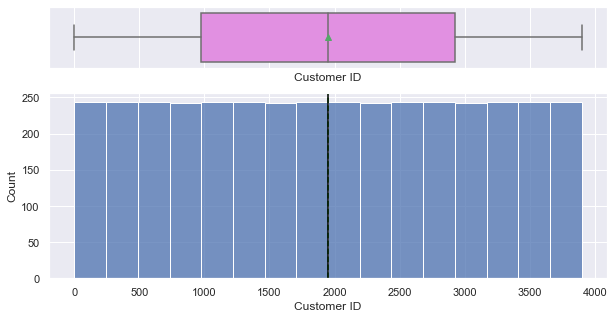

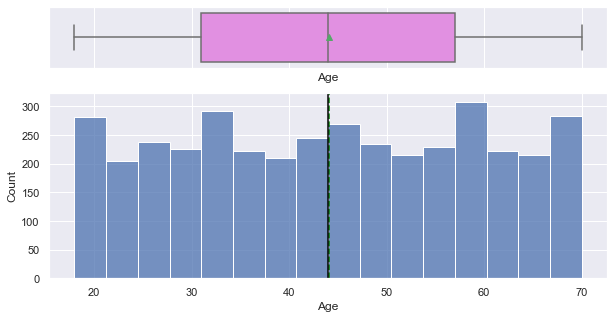

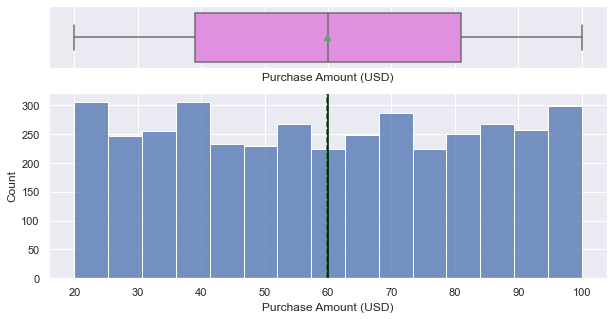

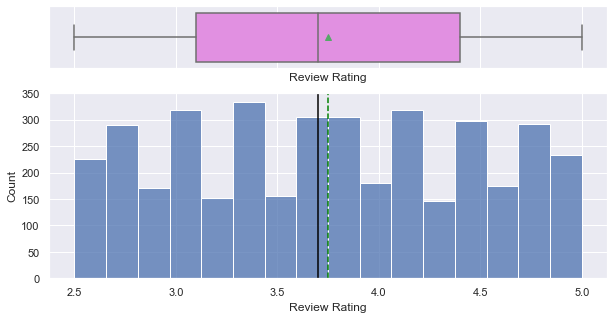

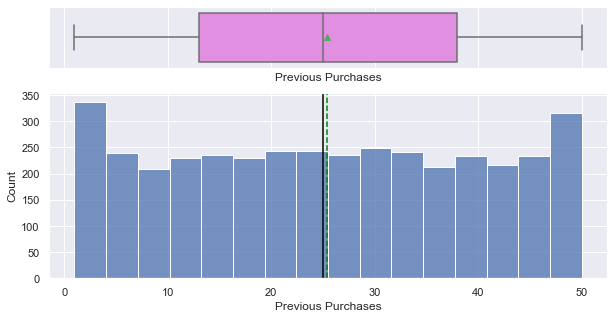

<IPython.core.display.Javascript object>

In [31]:
######## To activate the function massively
# Loop
for col in num_columns:
    histogram_boxplot(data, col)

In [32]:
# # function to plot stacked bar chart


# def stacked_barplot(data, predictor, target):
#     """
#     Print the category counts and plot a stacked bar chart

#     data: dataframe
#     predictor: independent variable
#     target: target variable
#     """
#     count = data[predictor].nunique()
#     sorter = data[target].value_counts().index[-1]
#     tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
#         by=sorter, ascending=False
#     )
#     print(tab1)
#     print("-" * 120)
#     tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
#         by=sorter, ascending=False
#     )
#     tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
#     plt.legend(
#         loc="lower left",
#         frameon=False,
#     )
#     plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
#     plt.show()

<IPython.core.display.Javascript object>

#### Categorical Columns

In [33]:
# function to create labeled barplots


def labeled_barplot(
    data,
    feature,
    perc=True,
    n=None,
):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(ascending=False),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [34]:
# for col in cat_columns:
# labeled_barplot(data, feature=col)

<IPython.core.display.Javascript object>

#### `Gender`:

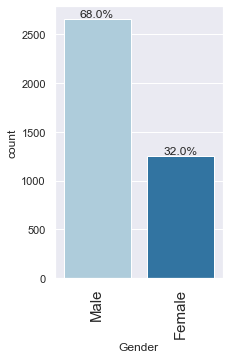

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "Gender", perc=True)

#### `Item Purchased`: 

Text(0.5, 1.0, 'Female: Bottom 5 Items Purchased')

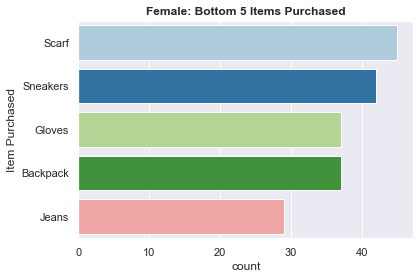

<IPython.core.display.Javascript object>

In [36]:
# bottom 5
sns.countplot(
    y="Item Purchased",
    data=female,
    palette="Paired",
    order=female["Item Purchased"].value_counts().iloc[-5:].index,
)
plt.title("Female: Bottom 5 Items Purchased", fontweight="bold")


Text(0.5, 1.0, 'Male: Bottom 5 Items Purchased')

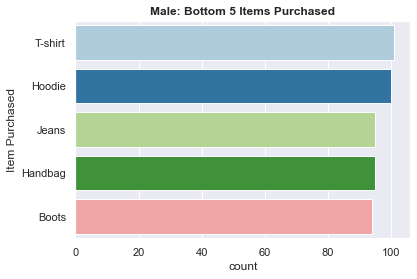

<IPython.core.display.Javascript object>

In [37]:
# bottom 5
sns.countplot(
    y="Item Purchased",
    data=male,
    palette="Paired",
    order=male["Item Purchased"].value_counts().iloc[-5:].index,
)
plt.title("Male: Bottom 5 Items Purchased", fontweight="bold")


Text(0.5, 1.0, 'Female: Top 5 Items Purchased')

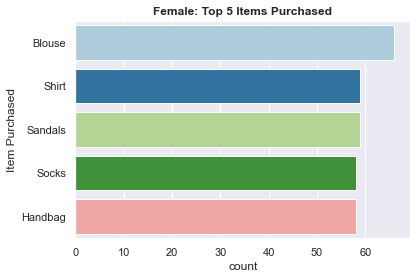

<IPython.core.display.Javascript object>

In [38]:
# top 5
sns.countplot(
    y="Item Purchased",
    data=female,
    palette="Paired",
    order=female["Item Purchased"].value_counts().iloc[:5].index,
)
plt.title("Female: Top 5 Items Purchased", fontweight="bold")

Text(0.5, 1.0, 'Male: top 5 Items Purchased')

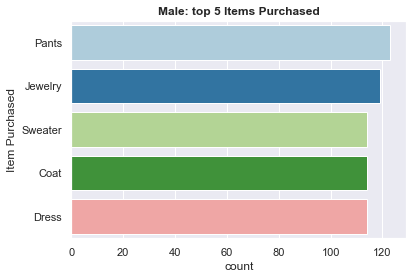

<IPython.core.display.Javascript object>

In [39]:
# top 5
sns.countplot(
    y="Item Purchased",
    data=male,
    palette="Paired",
    order=male["Item Purchased"].value_counts().iloc[:5].index,
)
plt.title("Male: top 5 Items Purchased", fontweight="bold")

#### `Location`:

Text(0.5, 1.0, 'Female: Top 5 Locations')

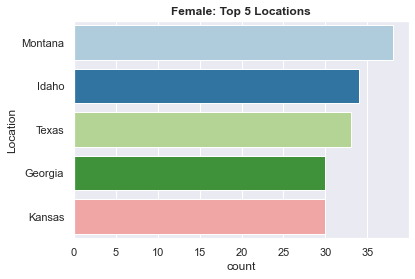

<IPython.core.display.Javascript object>

In [40]:
sns.countplot(
    y="Location",
    data=female,
    palette="Paired",
    order=female["Location"].value_counts().iloc[:5].index,
)
plt.title("Female: Top 5 Locations", fontweight="bold")

Text(0.5, 1.0, 'male: Top 5 Locations')

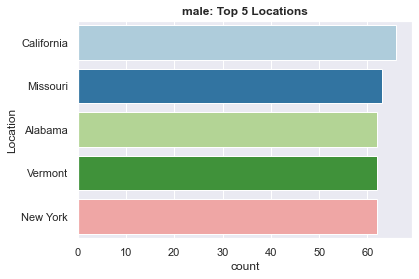

<IPython.core.display.Javascript object>

In [41]:
sns.countplot(
    y="Location",
    data=male,
    palette="Paired",
    order=male["Location"].value_counts().iloc[:5].index,
)
plt.title("male: Top 5 Locations", fontweight="bold")

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Montana'),
  Text(0, 1, 'California'),
  Text(0, 2, 'Idaho'),
  Text(0, 3, 'Illinois'),
  Text(0, 4, 'Alabama')])

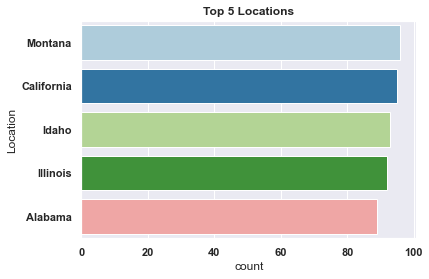

<IPython.core.display.Javascript object>

In [42]:
sns.countplot(
    y="Location",
    data=data,
    palette="Paired",
    order=data["Location"].value_counts().iloc[:5].index,
)
plt.title("Top 5 Locations", fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

#### `Size`:

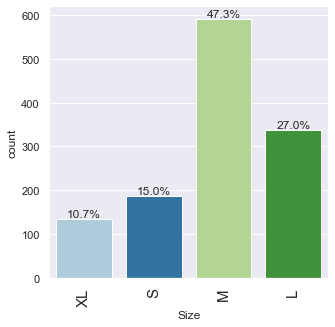

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(female, "Size", perc=True)

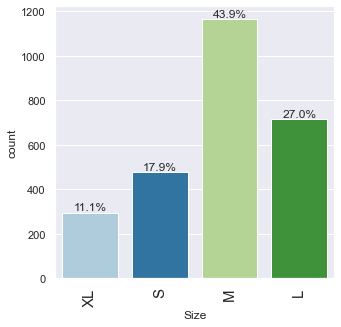

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(male, "Size", perc=True)

#### `Color`:

Text(0.5, 1.0, 'Female: Top 5 Colors')

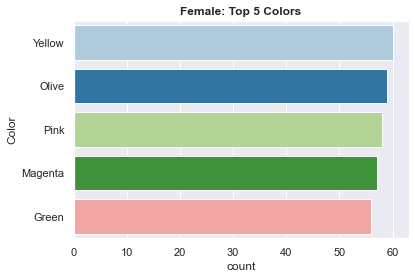

<IPython.core.display.Javascript object>

In [45]:
sns.countplot(
    y="Color",
    data=female,
    palette="Paired",
    order=female["Color"].value_counts().iloc[:5].index,
)
plt.title("Female: Top 5 Colors", fontweight="bold")

Text(0.5, 1.0, 'male: Top 5 Colors')

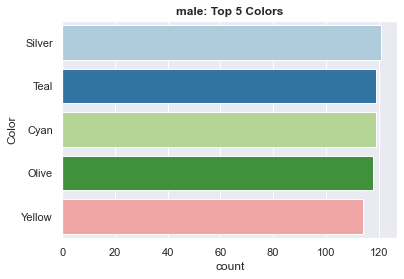

<IPython.core.display.Javascript object>

In [46]:
sns.countplot(
    y="Color",
    data=male,
    palette="Paired",
    order=male["Color"].value_counts().iloc[:5].index,
)
plt.title("male: Top 5 Colors", fontweight="bold")

Text(0.5, 1.0, 'Female: Bottom 5 Colors')

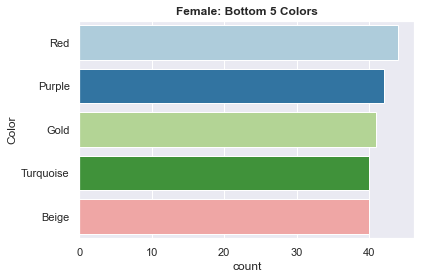

<IPython.core.display.Javascript object>

In [47]:
sns.countplot(
    y="Color",
    data=female,
    palette="Paired",
    order=female["Color"].value_counts().iloc[-5:].index,
)
plt.title("Female: Bottom 5 Colors", fontweight="bold")

Text(0.5, 1.0, 'male: bottom 5 Colors')

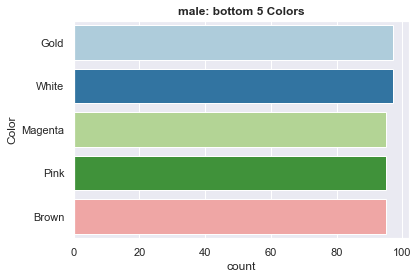

<IPython.core.display.Javascript object>

In [48]:
sns.countplot(
    y="Color",
    data=male,
    palette="Paired",
    order=male["Color"].value_counts().iloc[-5:].index,
)
plt.title("male: bottom 5 Colors", fontweight="bold")

#### `Season`:

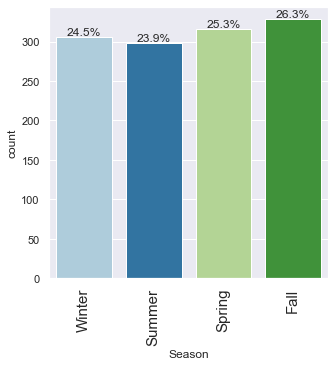

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(female, "Season", perc=True)

# # lineplot to know frequency of items and how much time they are purchased previously.
# plt.figure(figsize=(15, 5))
# sns.lineplot(
#     data=data, y=data["Purchase Amount (USD)"].value_counts(), x="Season", ci=False
# )
# plt.xticks(rotation=90)
# plt.show()

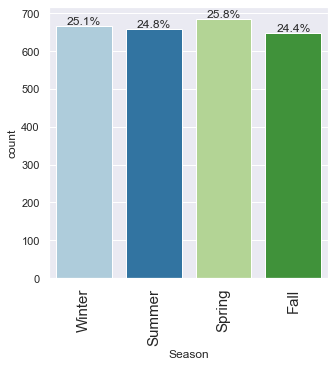

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(male, "Season", perc=True)

#### `Subscription Status`:

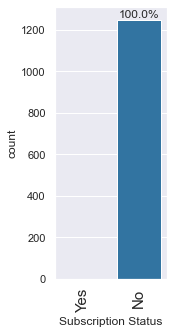

<IPython.core.display.Javascript object>

In [51]:
labeled_barplot(female, "Subscription Status", perc=True)

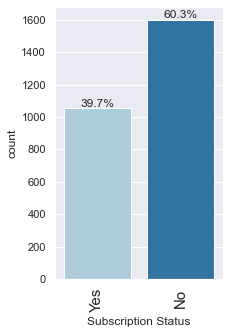

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(male, "Subscription Status", perc=True)

#### `Shipping Type`:

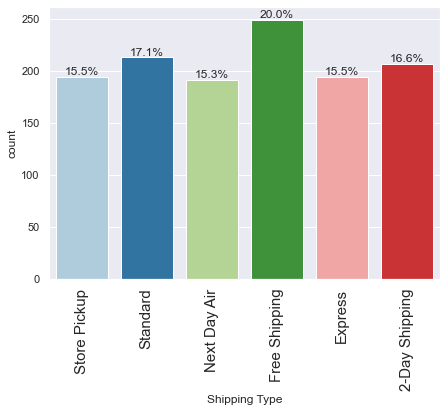

<IPython.core.display.Javascript object>

In [53]:
labeled_barplot(female, "Shipping Type", perc=True)

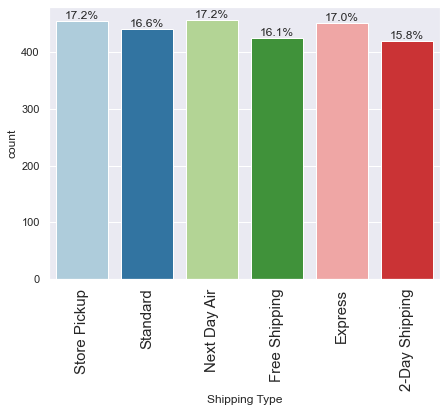

<IPython.core.display.Javascript object>

In [54]:
labeled_barplot(male, "Shipping Type", perc=True)

#### `Discount Applied`:

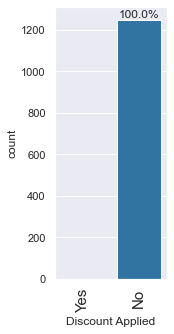

<IPython.core.display.Javascript object>

In [55]:
labeled_barplot(female, "Discount Applied", perc=True)

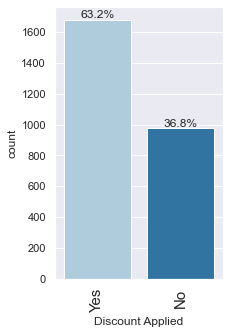

<IPython.core.display.Javascript object>

In [56]:
labeled_barplot(male, "Discount Applied", perc=True)

#### `Payment Method`:

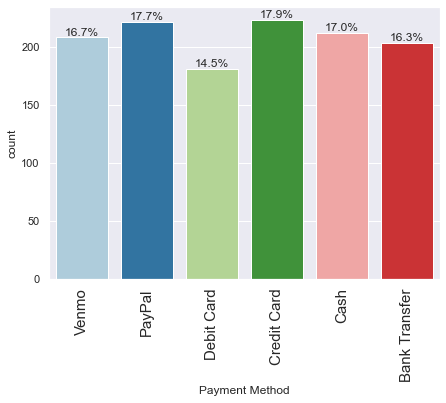

<IPython.core.display.Javascript object>

In [57]:
labeled_barplot(female, "Payment Method", perc=True)

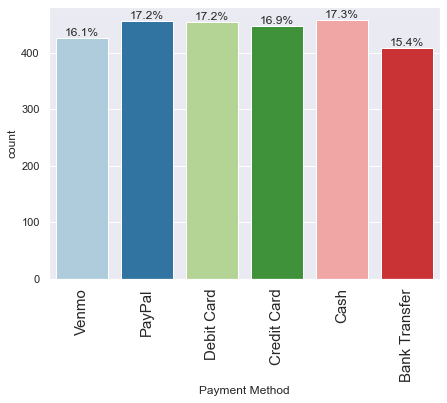

<IPython.core.display.Javascript object>

In [58]:
labeled_barplot(male, "Payment Method", perc=True)

#### `Frequency of Purchases`:

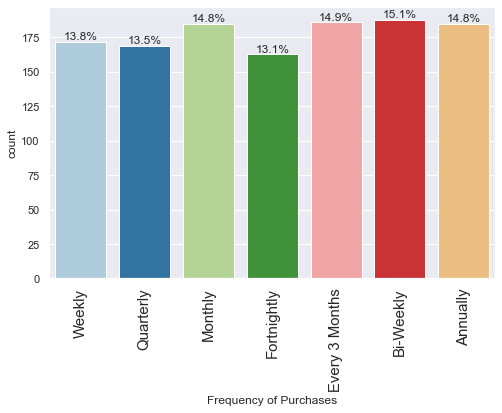

<IPython.core.display.Javascript object>

In [59]:
labeled_barplot(female, "Frequency of Purchases", perc=True)

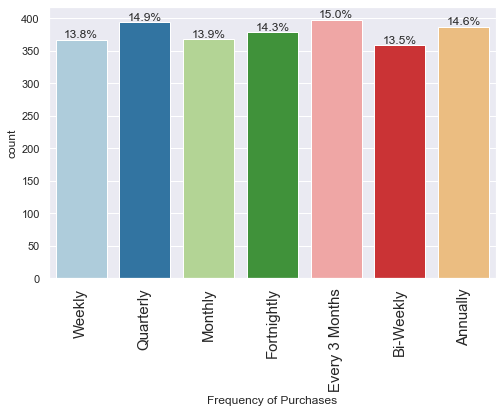

<IPython.core.display.Javascript object>

In [60]:
labeled_barplot(male, "Frequency of Purchases", perc=True)

#### `age_group`:

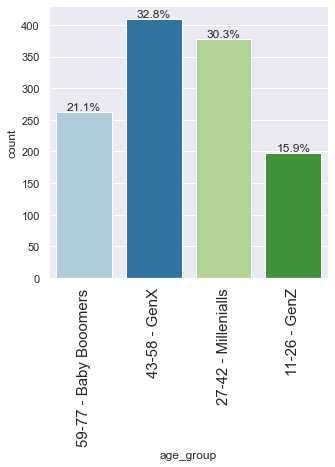

<IPython.core.display.Javascript object>

In [61]:
labeled_barplot(female, "age_group", perc=True)

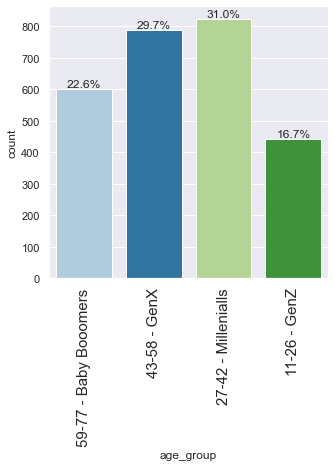

<IPython.core.display.Javascript object>

In [62]:
labeled_barplot(male, "age_group", perc=True)

### Bivariate analysis

### Let's see how the `Purchase Amount` and `Review Rating` are by `Gender` across attributes

In [63]:
num_columns

Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')

<IPython.core.display.Javascript object>

In [64]:
cat_columns

Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases',
       'age_group'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Numerical Columns

`Rating`

/Users/nataliavelasquez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


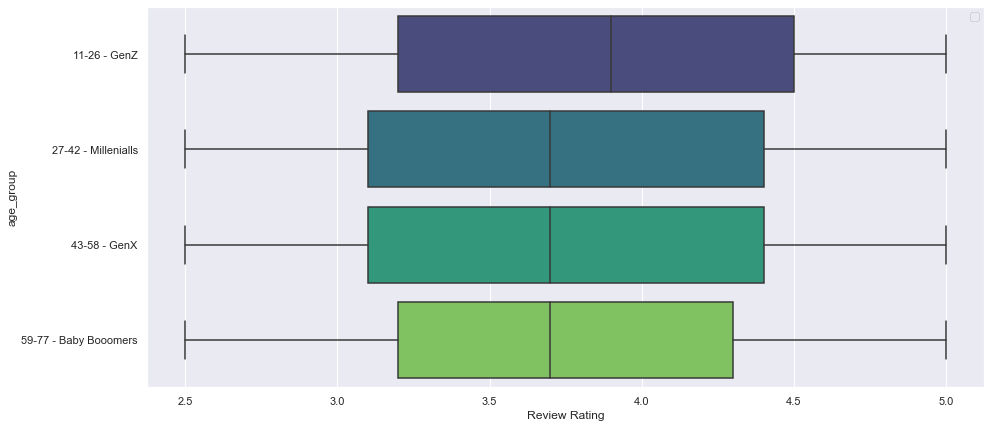

<IPython.core.display.Javascript object>

In [65]:
plt.figure(figsize=(15, 7))
sns.boxplot(male["Review Rating"], male["age_group"], palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

/Users/nataliavelasquez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


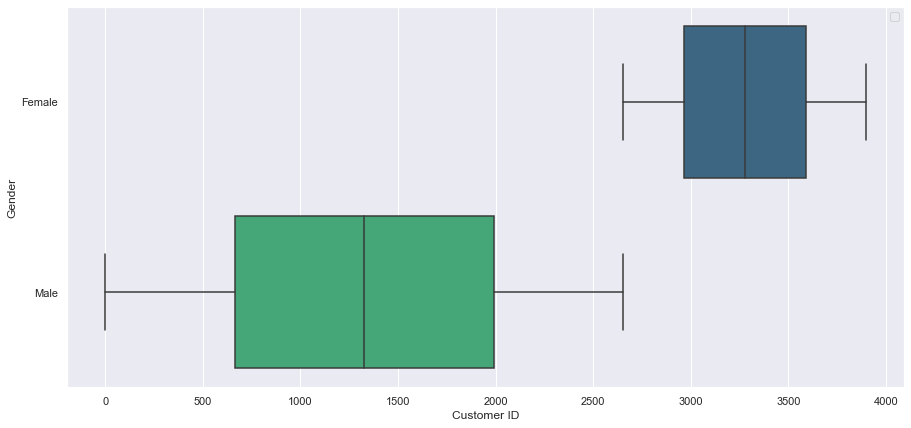

<IPython.core.display.Javascript object>

In [66]:
plt.figure(figsize=(15, 7))
sns.boxplot(data["Customer ID"], data["Gender"], palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

/Users/nataliavelasquez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


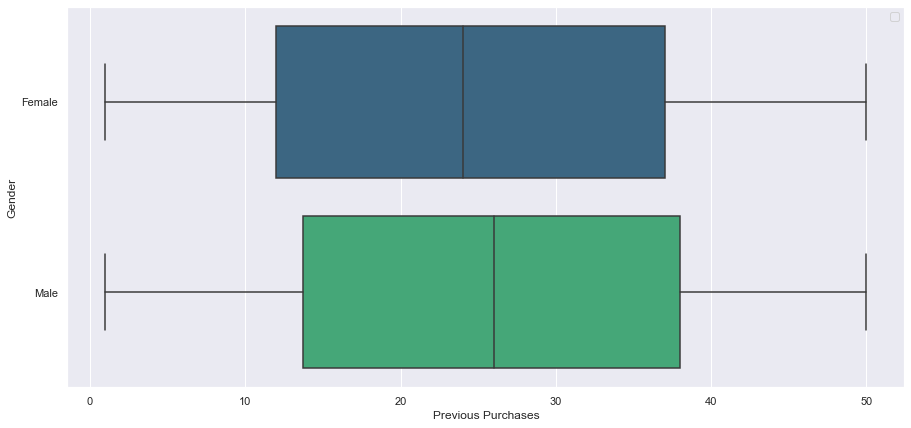

<IPython.core.display.Javascript object>

In [67]:
plt.figure(figsize=(15, 7))
sns.boxplot(
    data["Previous Purchases"],
    data["Gender"],
    palette="viridis",
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

#### Categorical Columns

#### `Gender`:

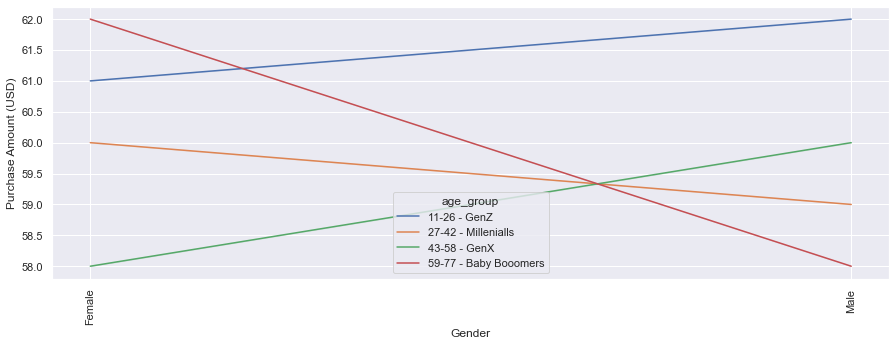

<IPython.core.display.Javascript object>

In [68]:
# trending items between male and females
plt.figure(figsize=(15, 5))
sns.lineplot(
    data=data,
    y="Purchase Amount (USD)",
    x="Gender",
    hue="age_group",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.show()

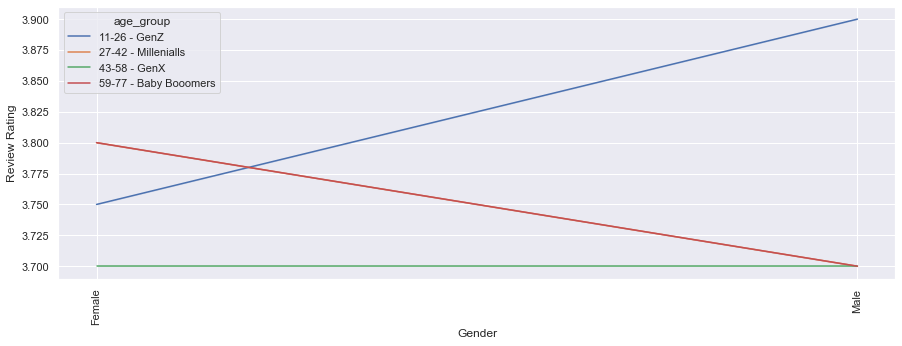

<IPython.core.display.Javascript object>

In [69]:
# trending items between male and females
plt.figure(figsize=(15, 5))
sns.lineplot(
    data=data,
    y="Review Rating",
    x="Gender",
    hue="age_group",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.show()

#### `Item Purchased`: 

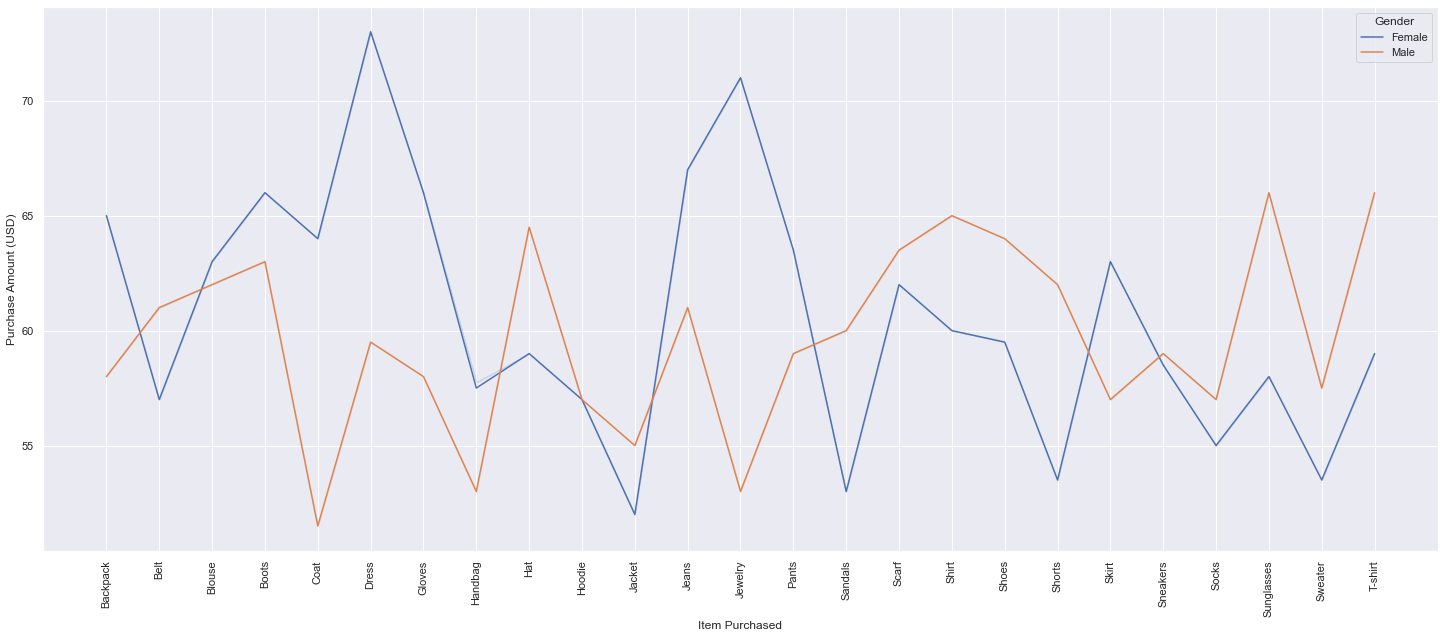

<IPython.core.display.Javascript object>

In [70]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data,
    y="Purchase Amount (USD)",
    x="Item Purchased",
    hue="Gender",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.show()

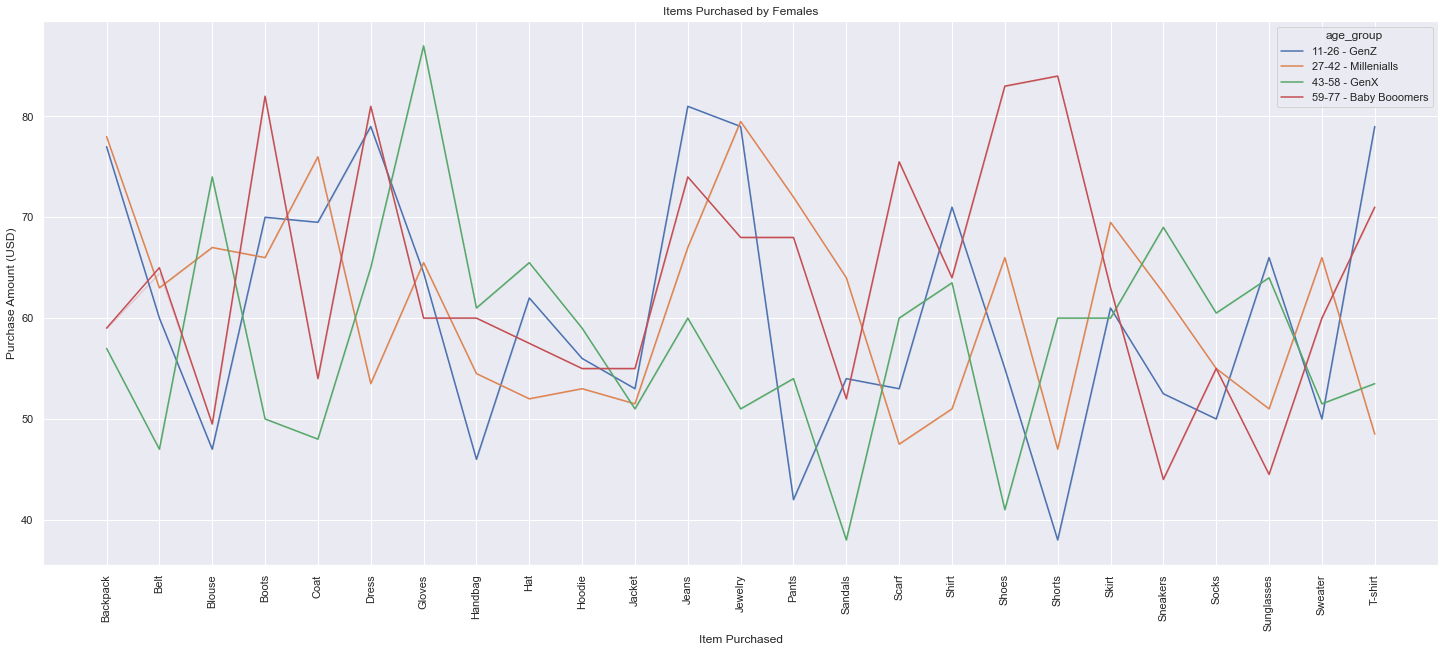

<IPython.core.display.Javascript object>

In [71]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=female,
    y="Purchase Amount (USD)",
    x="Item Purchased",
    hue="age_group",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Items Purchased by Females")
plt.show()

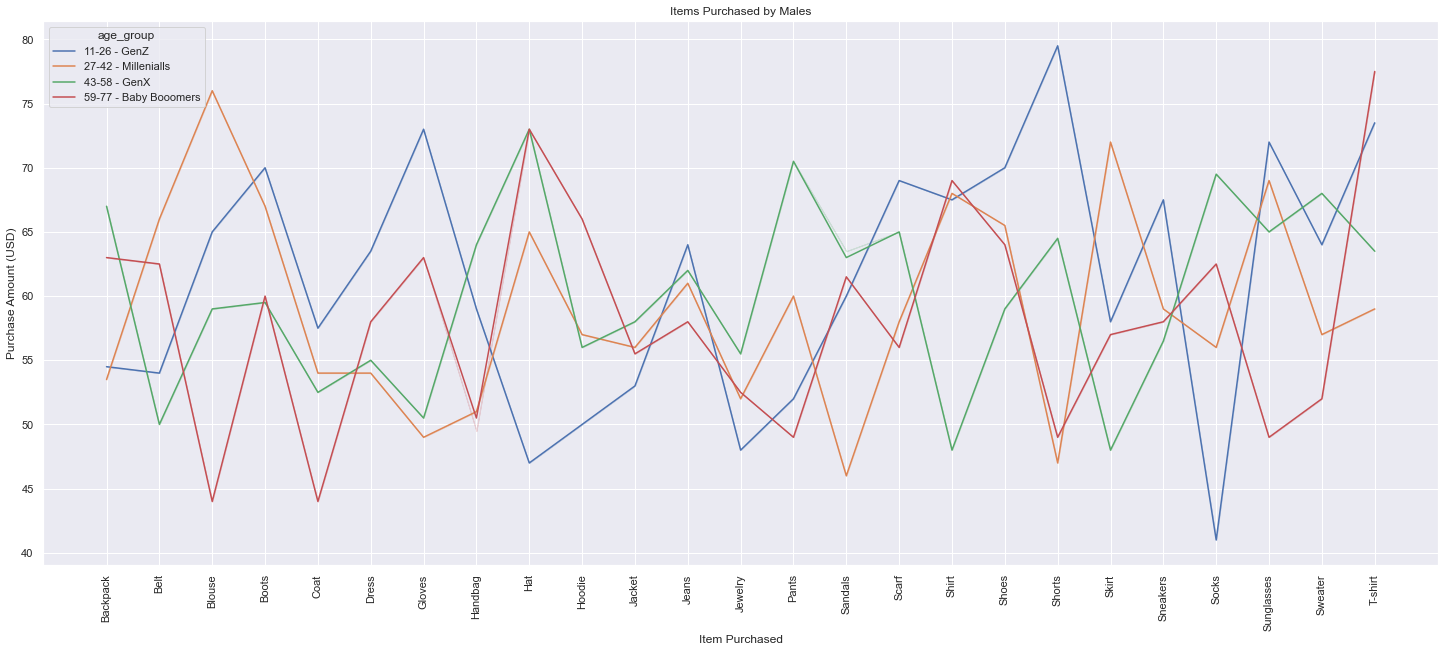

<IPython.core.display.Javascript object>

In [72]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=male,
    y="Purchase Amount (USD)",
    x="Item Purchased",
    hue="age_group",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Items Purchased by Males")
plt.show()

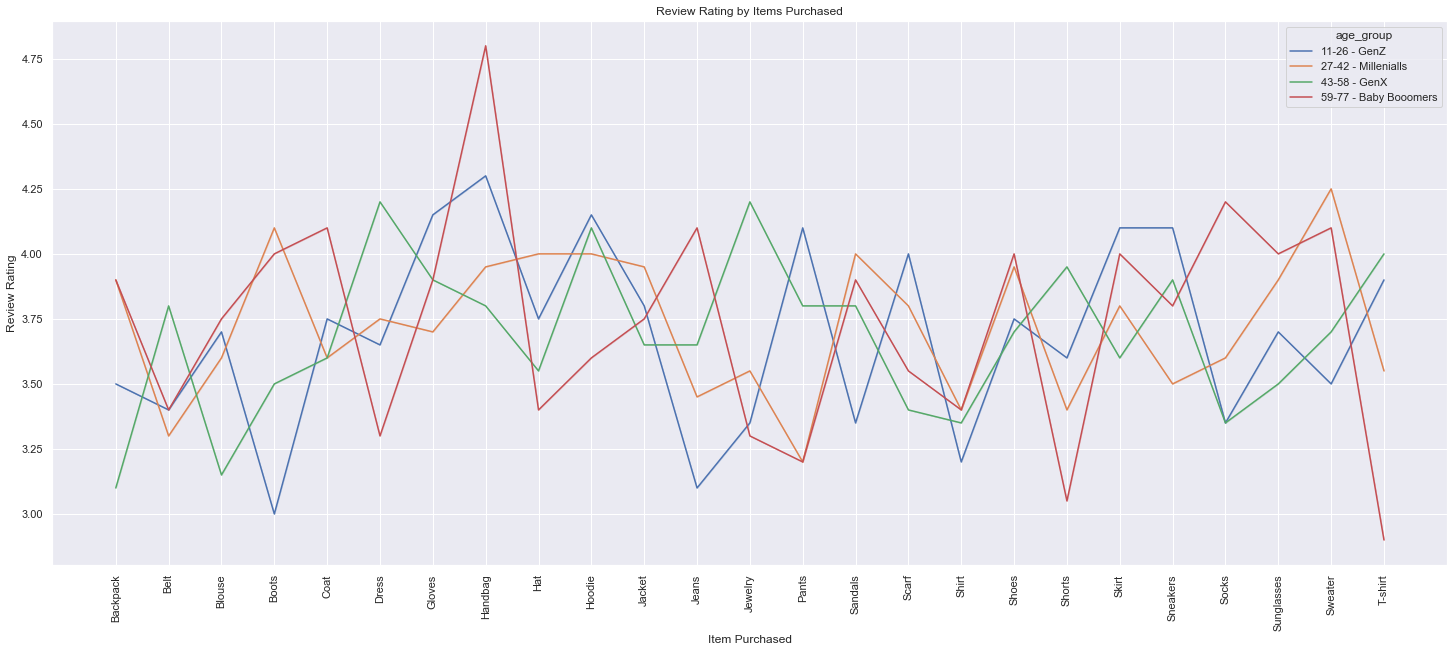

<IPython.core.display.Javascript object>

In [73]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=female,
    y="Review Rating",
    x="Item Purchased",
    hue="age_group",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Review Rating by Items Purchased")
plt.show()

#### `Location`:

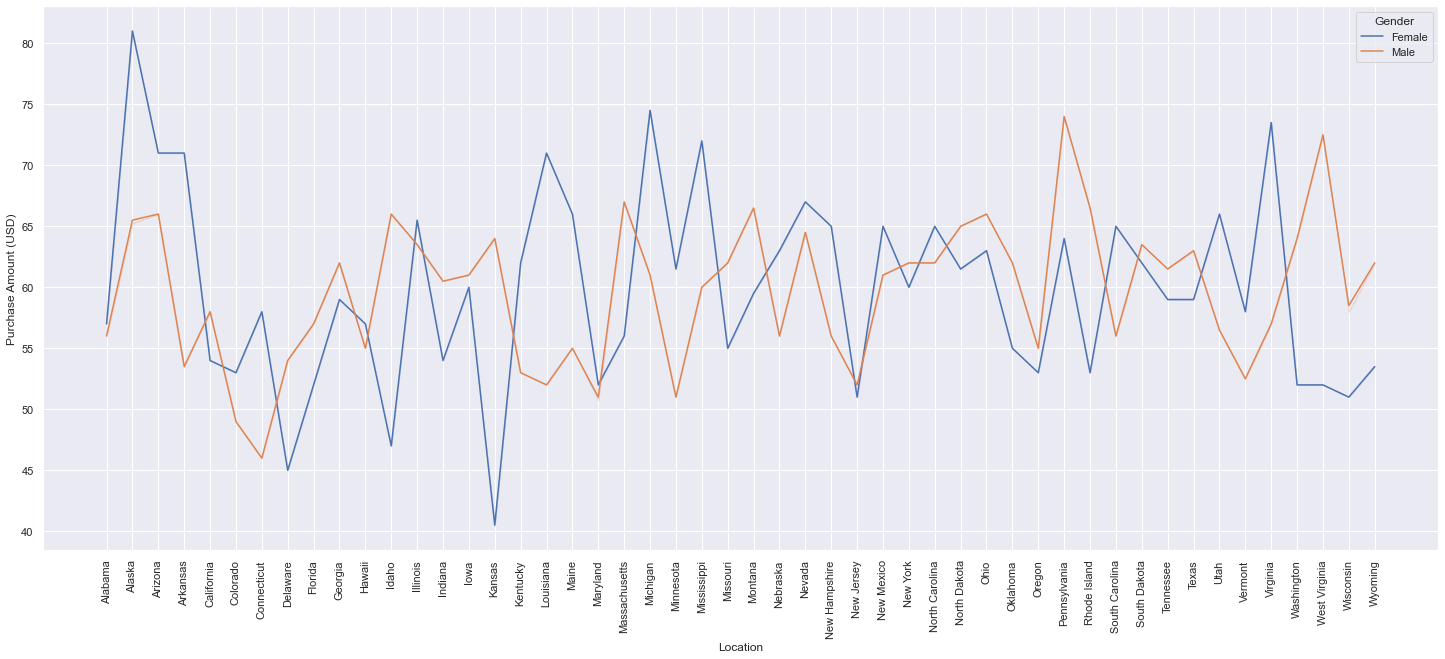

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data,
    y="Purchase Amount (USD)",
    x="Location",
    hue="Gender",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.show()

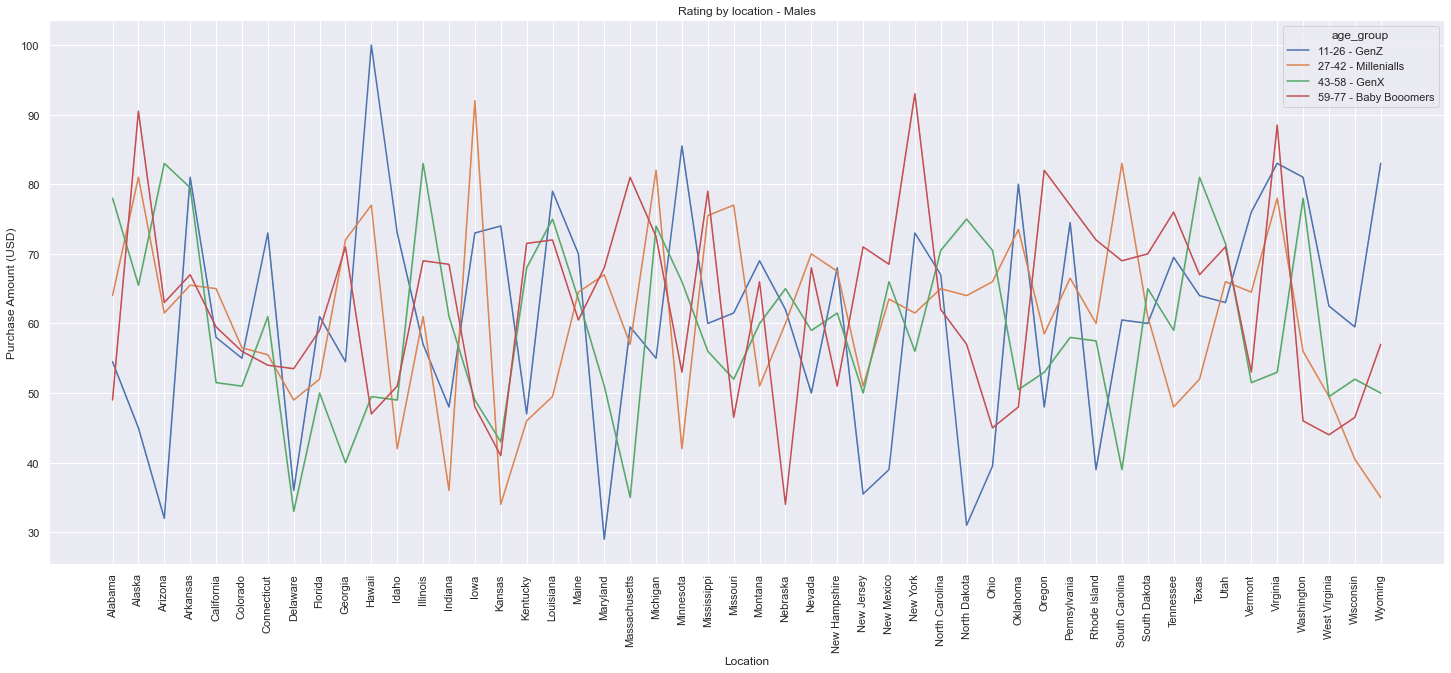

<IPython.core.display.Javascript object>

In [75]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=female,
    y="Purchase Amount (USD)",
    x="Location",
    hue="age_group",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Rating by location - Males")
plt.show()

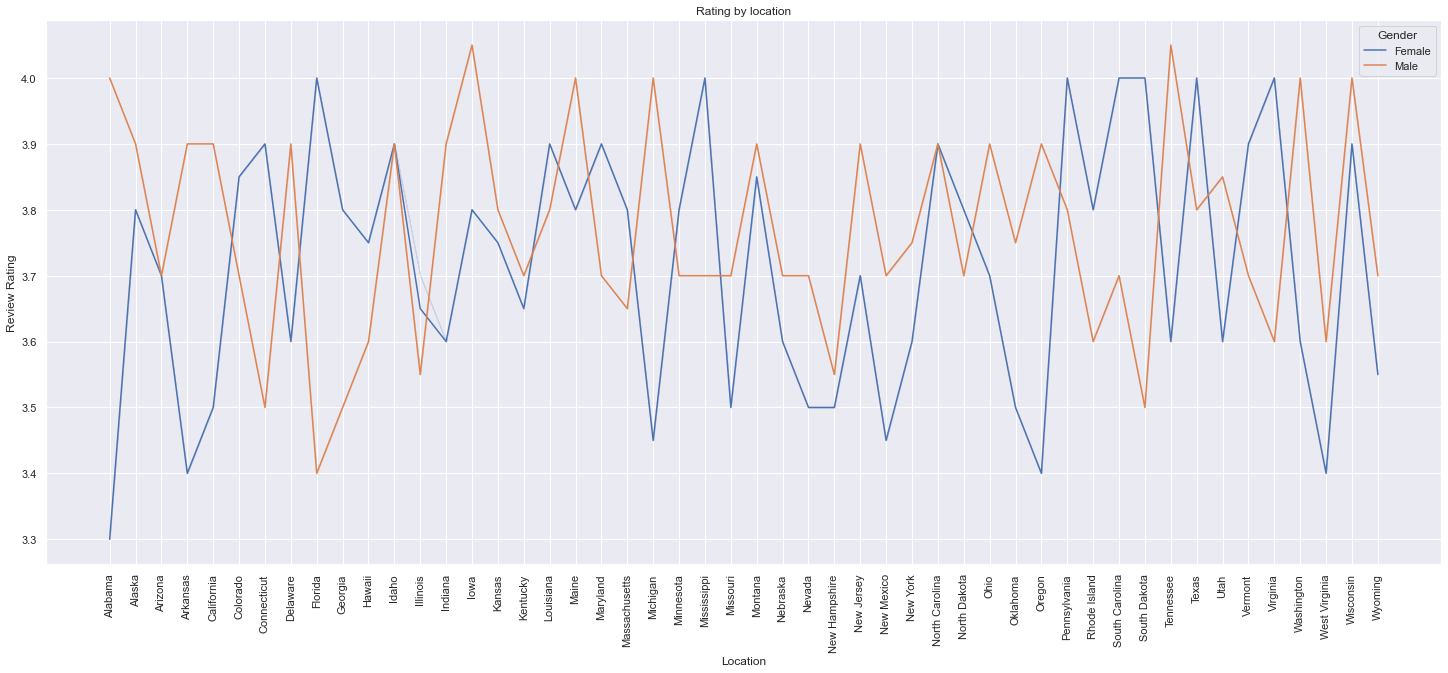

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data,
    y="Review Rating",
    x="Location",
    hue="Gender",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Rating by location")
plt.show()

#### `Size`:

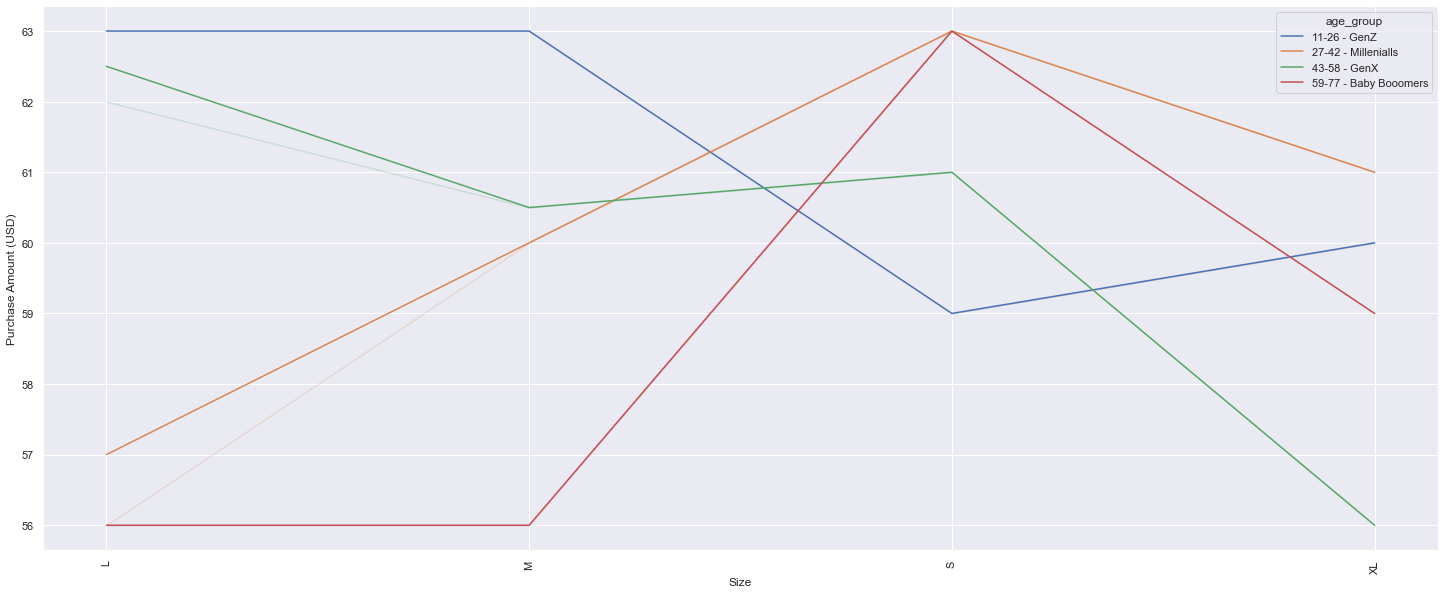

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=male,
    y="Purchase Amount (USD)",
    x="Size",
    hue="age_group",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.show()

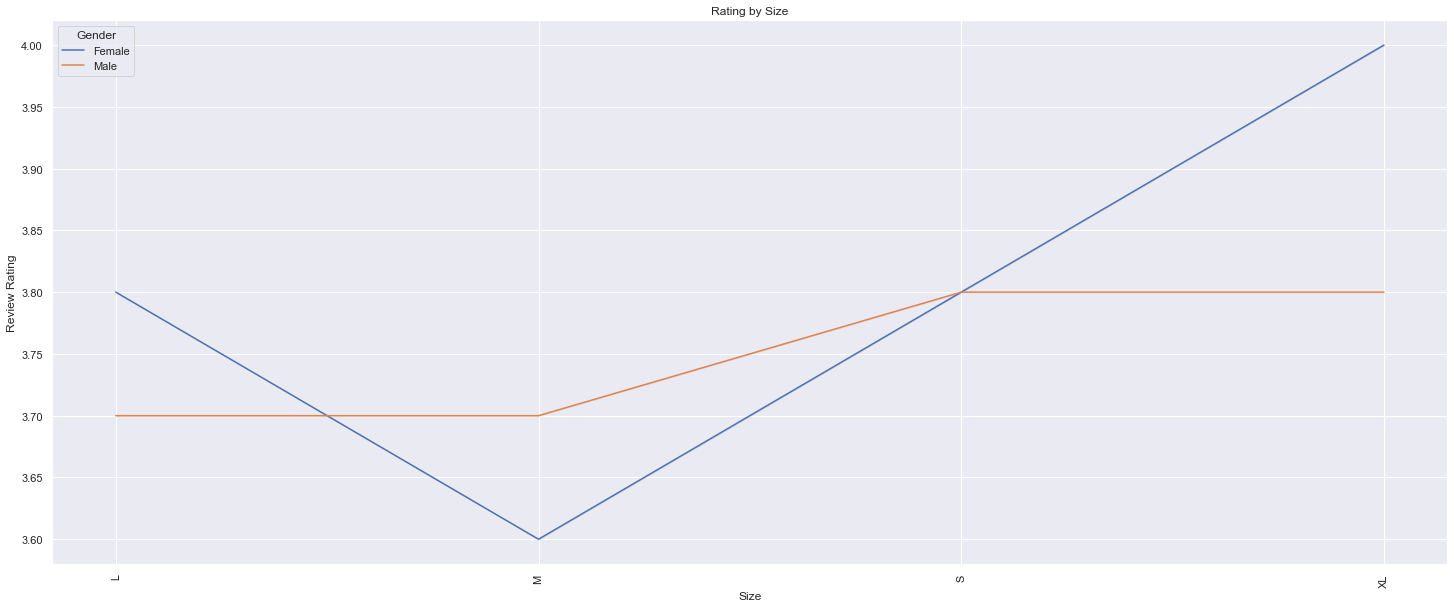

<IPython.core.display.Javascript object>

In [78]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data, y="Review Rating", x="Size", hue="Gender", ci=False, estimator=np.median
)
plt.xticks(rotation=90)
plt.title("Rating by Size")
plt.show()

#### `Color`:

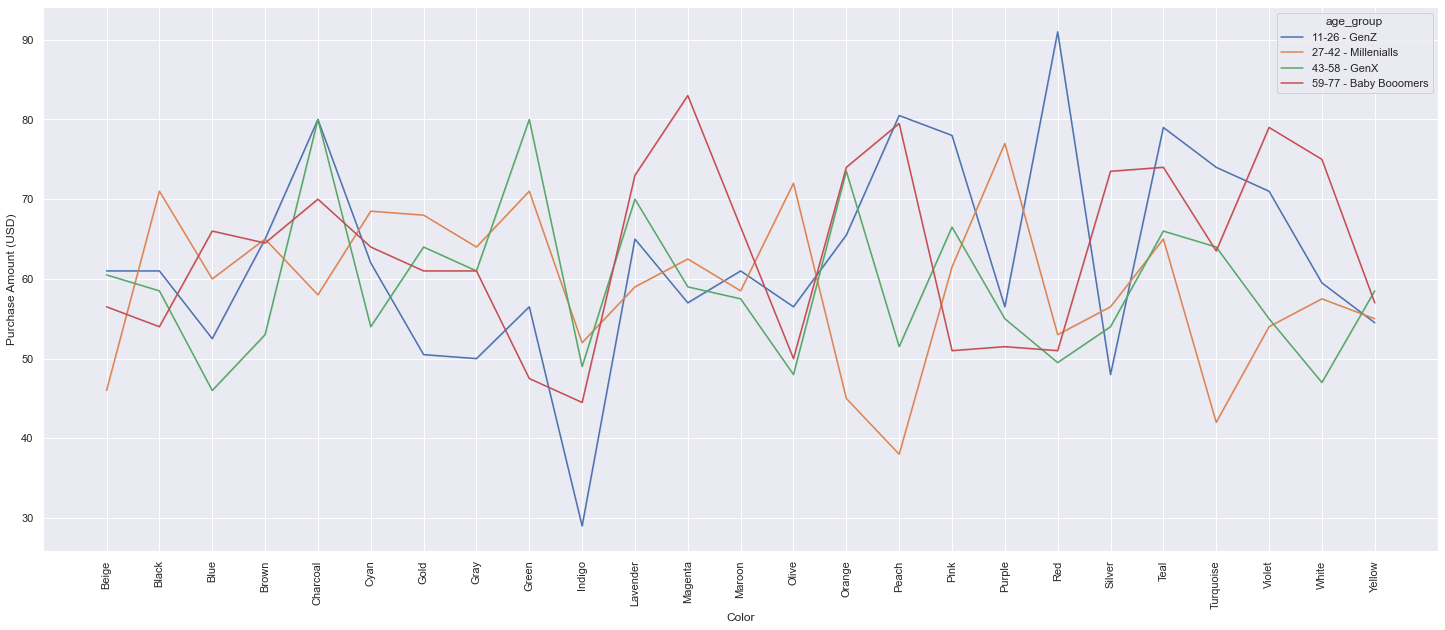

<IPython.core.display.Javascript object>

In [79]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=female,
    y="Purchase Amount (USD)",
    x="Color",
    hue="age_group",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.show()

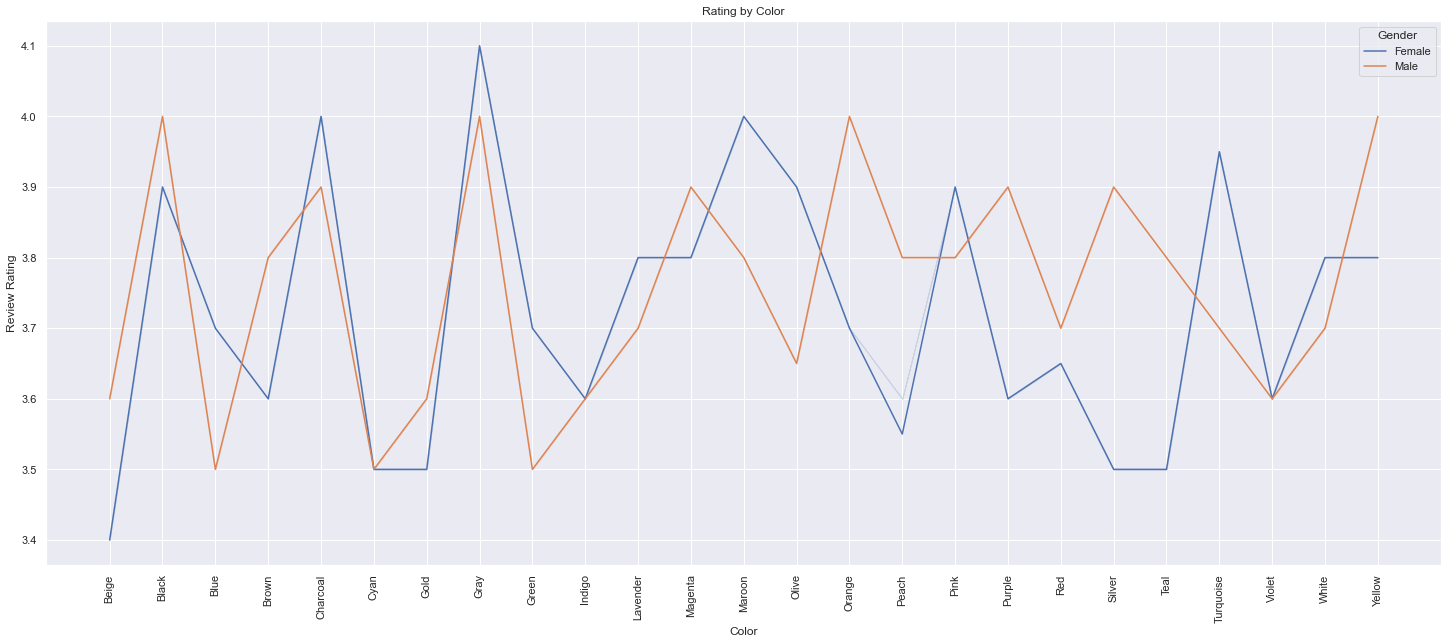

<IPython.core.display.Javascript object>

In [80]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data, y="Review Rating", x="Color", hue="Gender", ci=False, estimator=np.median
)
plt.xticks(rotation=90)
plt.title("Rating by Color")
plt.show()

#### `Season`:

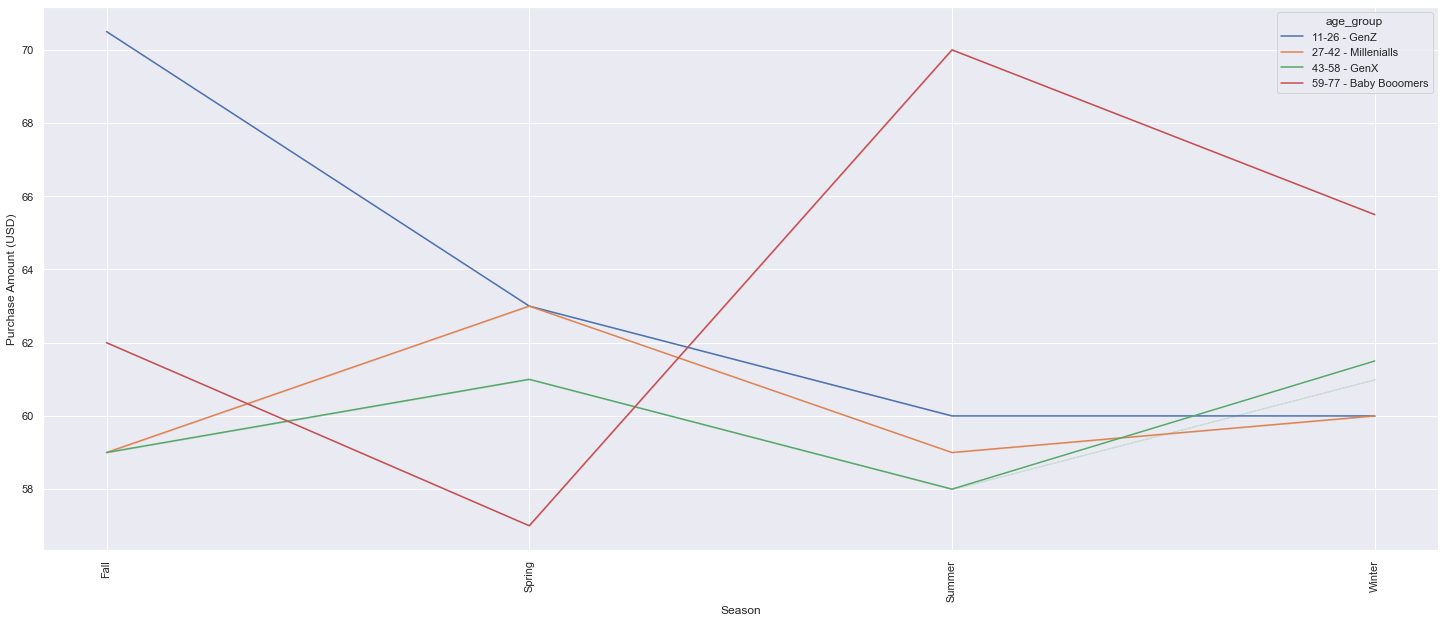

<IPython.core.display.Javascript object>

In [81]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=female,
    y="Purchase Amount (USD)",
    x="Season",
    hue="age_group",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.show()

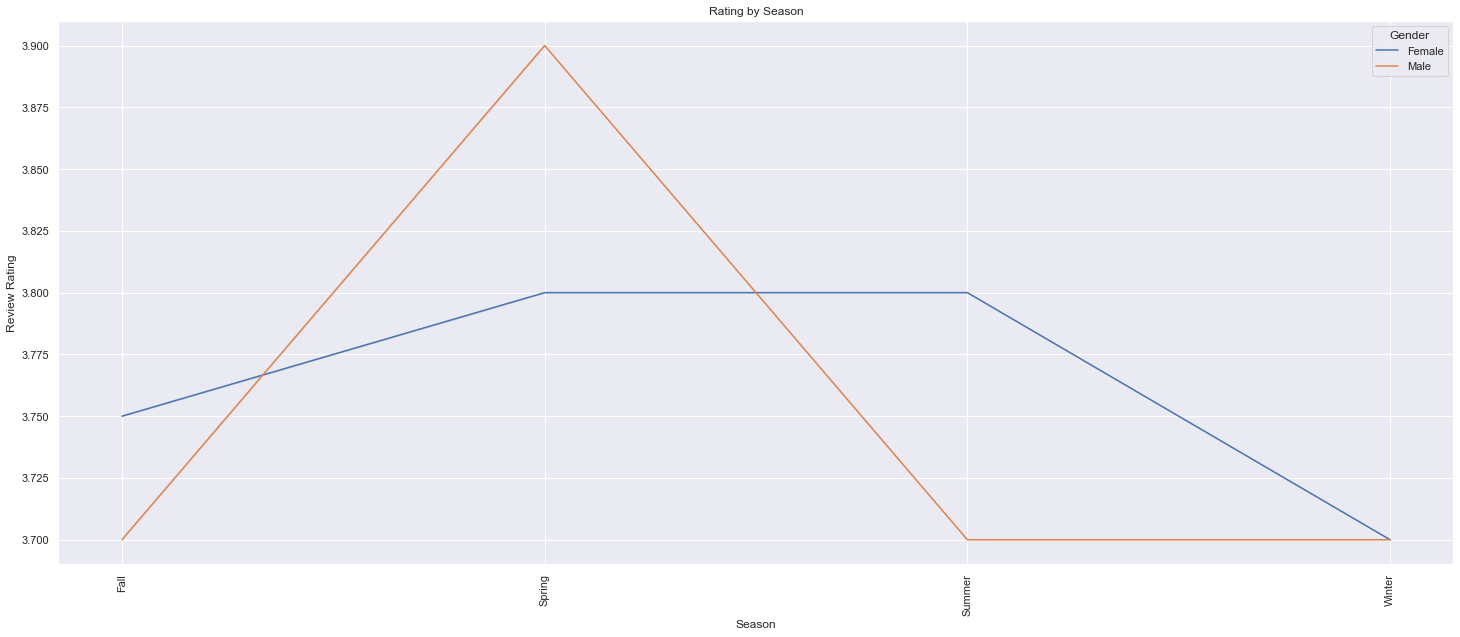

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data,
    y="Review Rating",
    x="Season",
    hue="Gender",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Rating by Season")
plt.show()

#### `Subscription Status`:

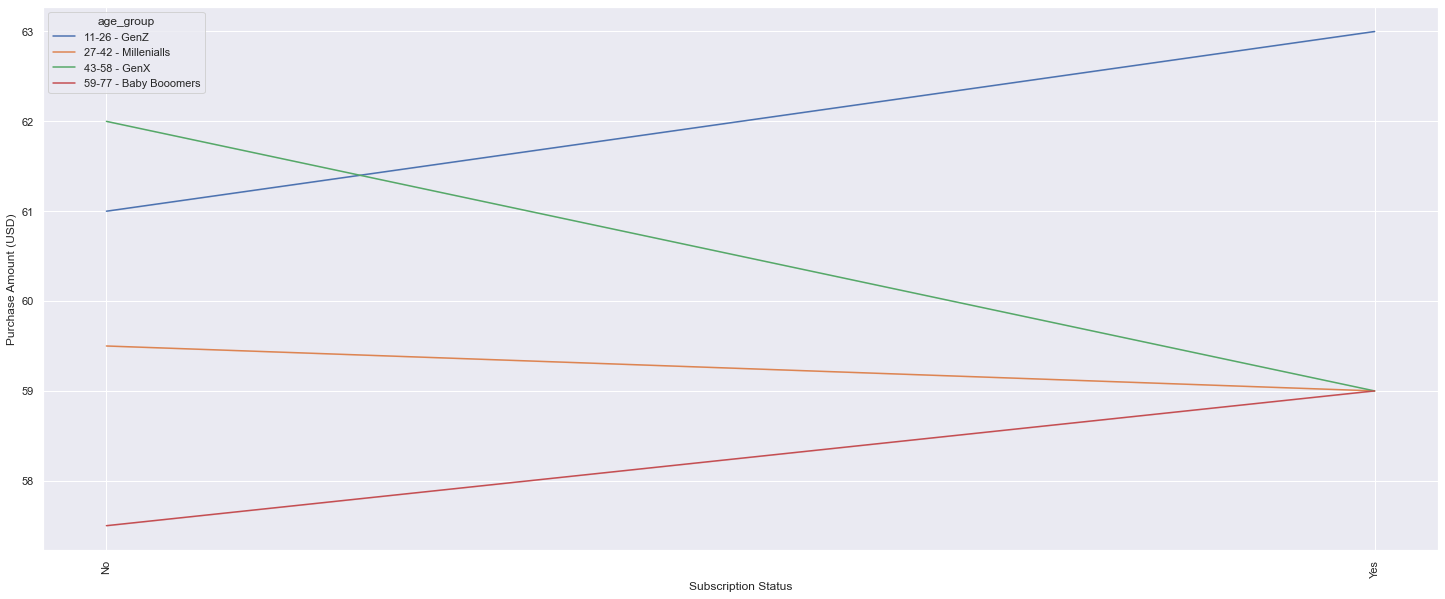

<IPython.core.display.Javascript object>

In [83]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=male,
    y="Purchase Amount (USD)",
    x="Subscription Status",
    hue="age_group",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.show()

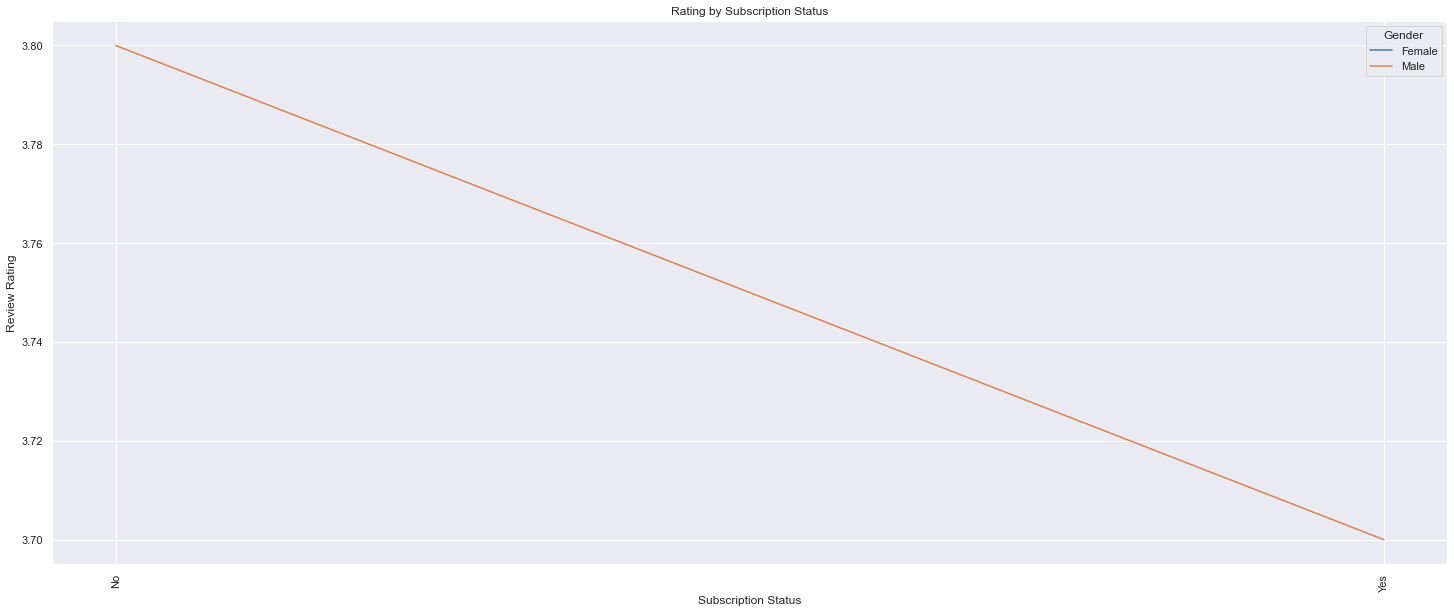

<IPython.core.display.Javascript object>

In [84]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data,
    y="Review Rating",
    x="Subscription Status",
    hue="Gender",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Rating by Subscription Status")
plt.show()

#### `Shipping Type`:

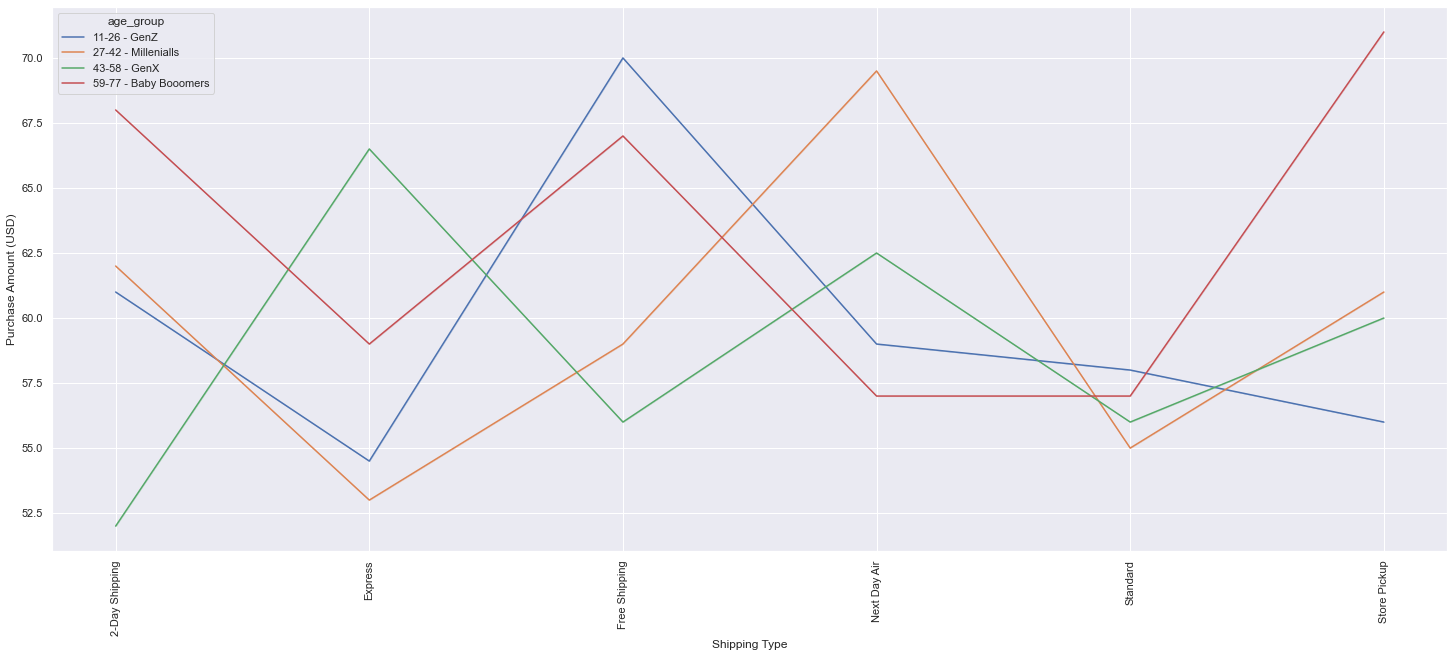

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=female,
    y="Purchase Amount (USD)",
    x="Shipping Type",
    hue="age_group",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.show()

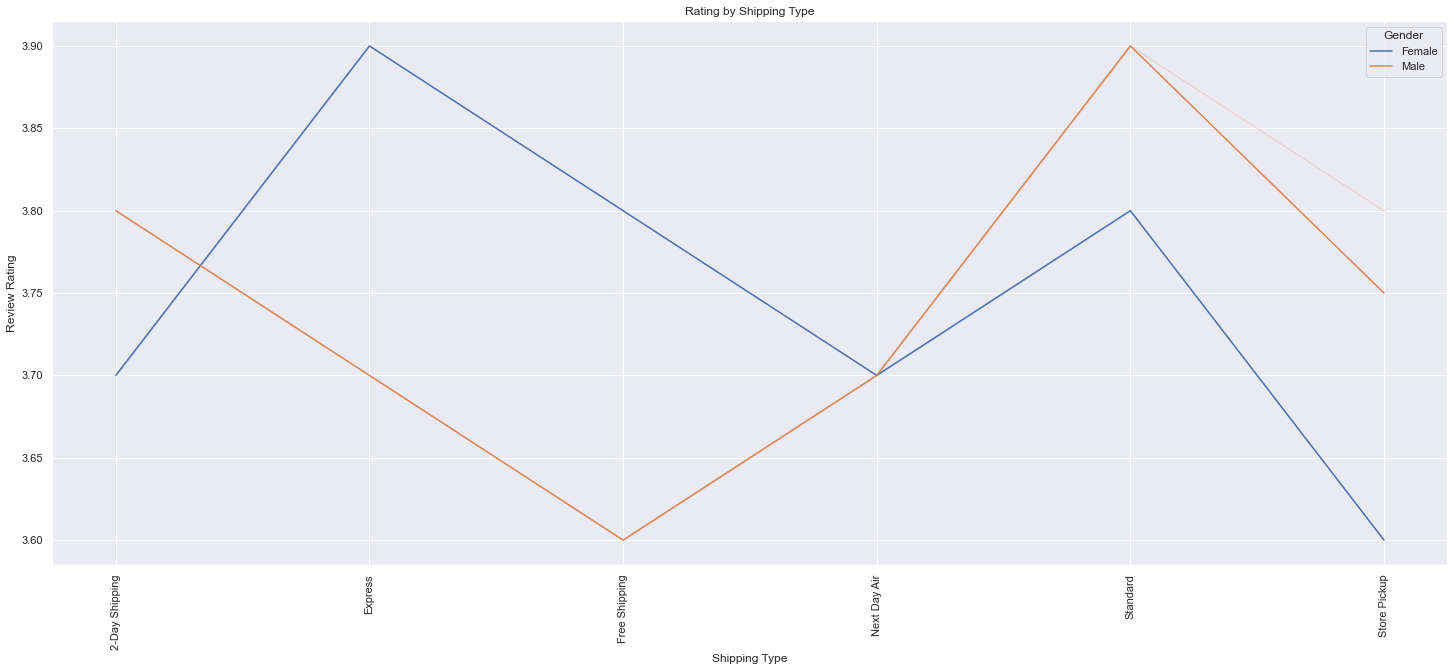

<IPython.core.display.Javascript object>

In [86]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data,
    y="Review Rating",
    x="Shipping Type",
    hue="Gender",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Rating by Shipping Type")
plt.show()

#### `Discount Applied`:

<AxesSubplot:xlabel='Discount Applied', ylabel='Purchase Amount (USD)'>

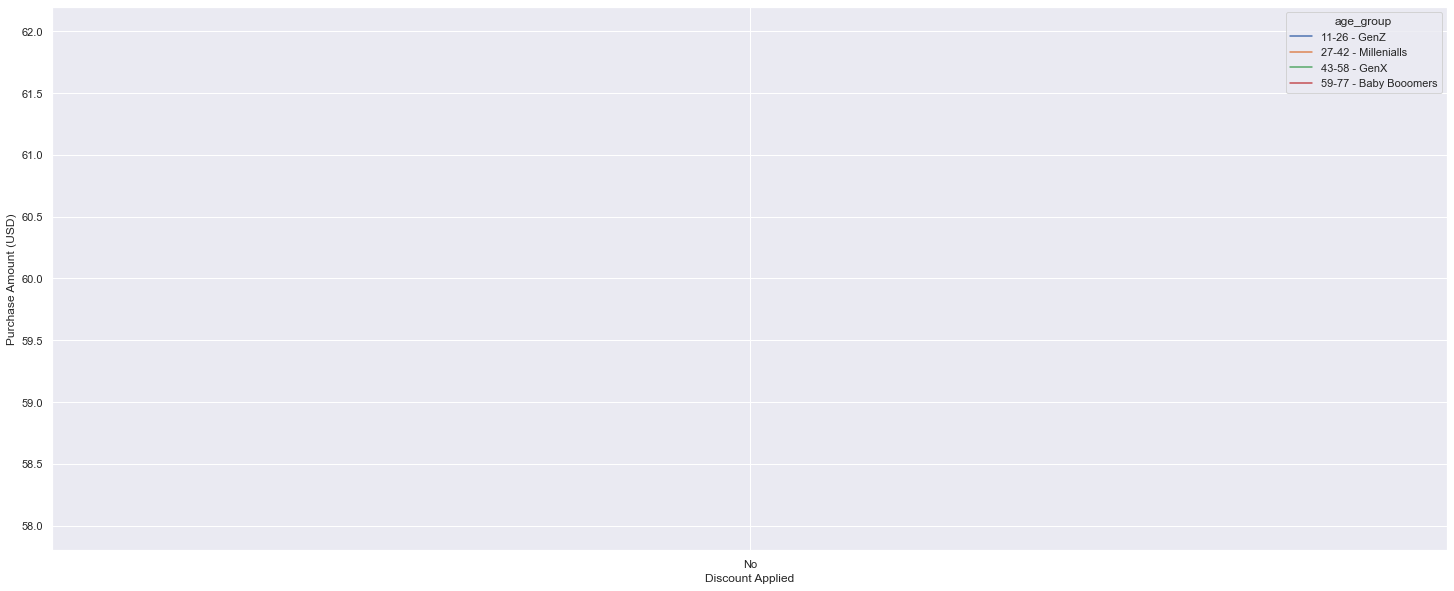

<IPython.core.display.Javascript object>

In [87]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=female,
    y="Purchase Amount (USD)",
    x="Discount Applied",
    hue="age_group",
    ci=False,
estimator=np.median)


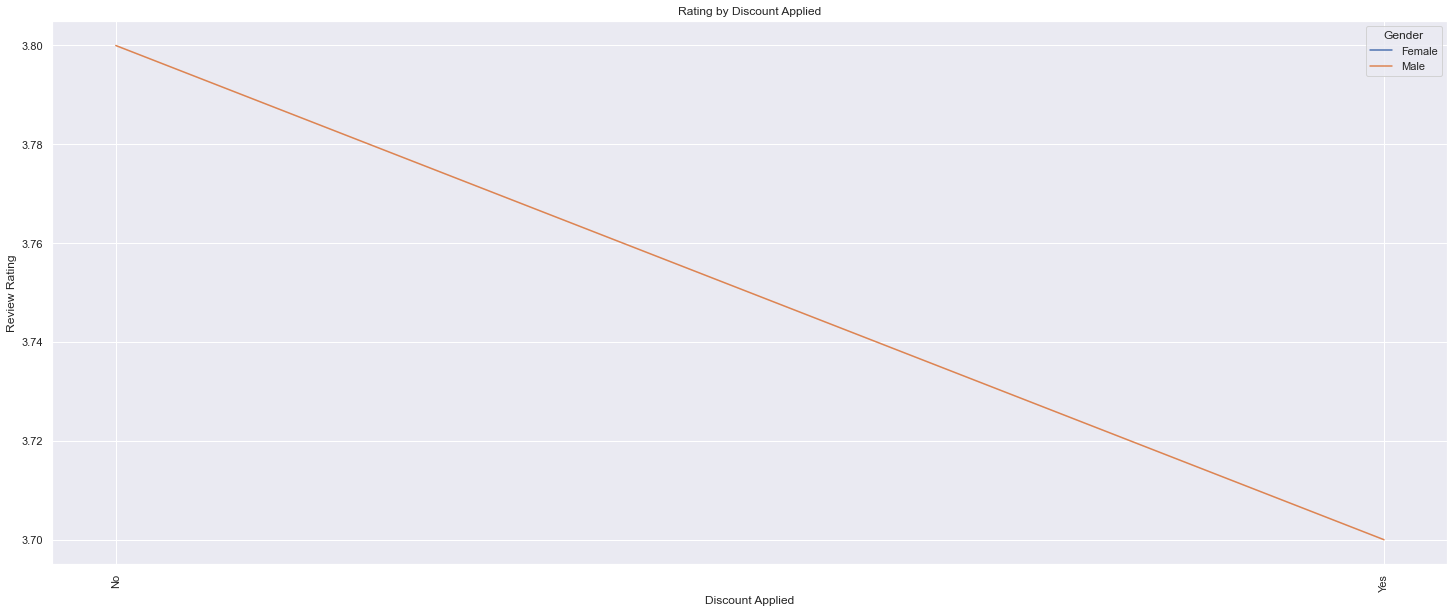

<IPython.core.display.Javascript object>

In [88]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data,
    y="Review Rating",
    x="Discount Applied",
    hue="Gender",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Rating by Discount Applied")
plt.show()

#### `Payment Method`:

<AxesSubplot:xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

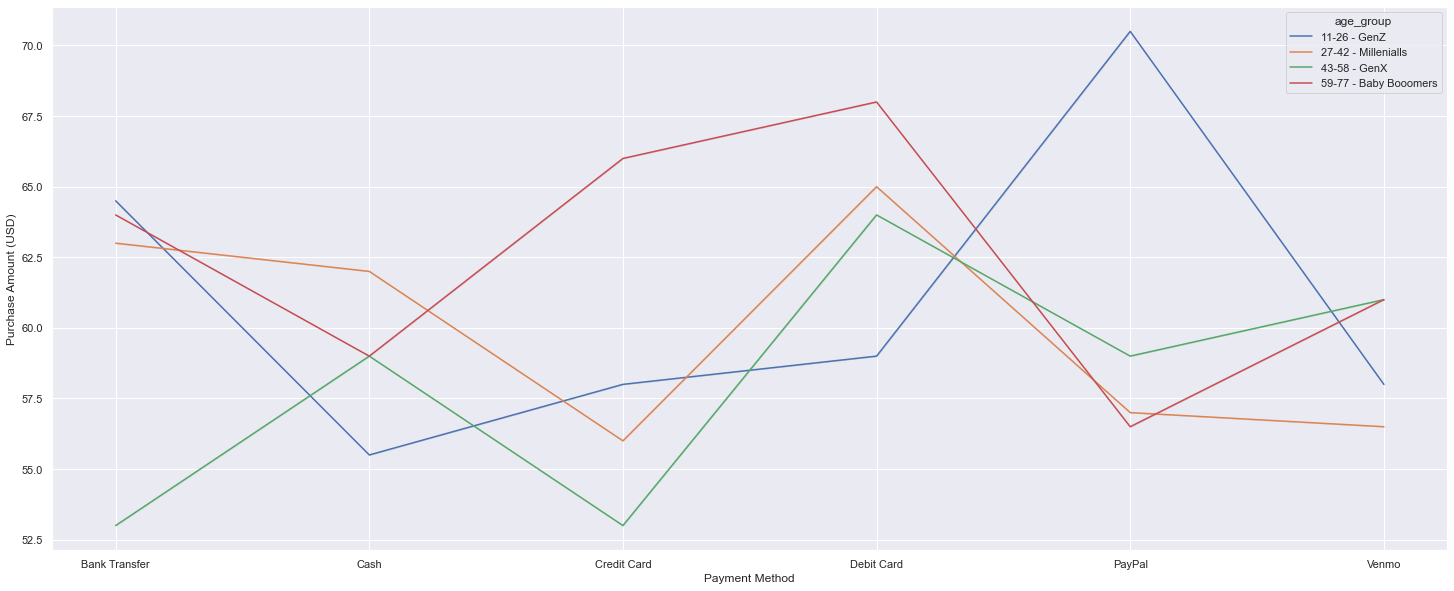

<IPython.core.display.Javascript object>

In [89]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=female,
    y="Purchase Amount (USD)",
    x="Payment Method",
    hue="age_group",
    ci=False,
estimator=np.median)


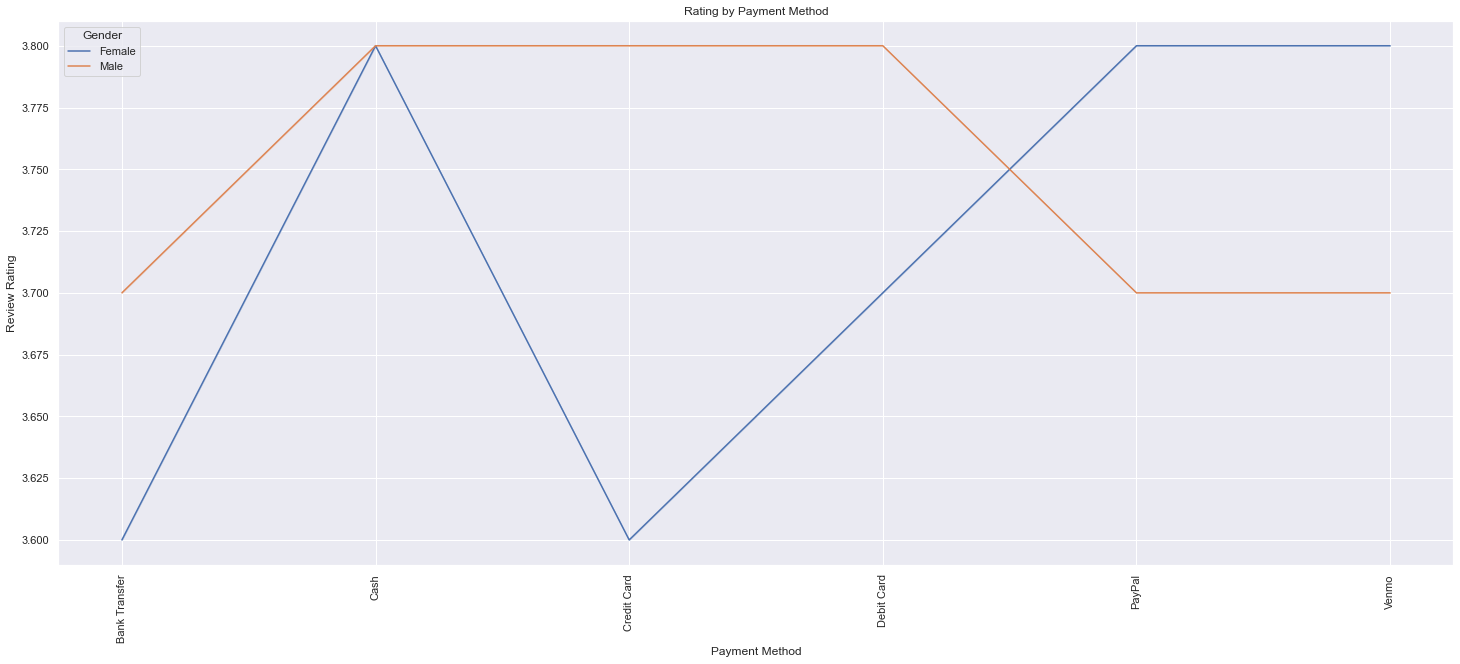

<IPython.core.display.Javascript object>

In [90]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data,
    y="Review Rating",
    x="Payment Method",
    hue="Gender",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Rating by Payment Method")
plt.show()

#### `Frequency of Purchases`:

<AxesSubplot:xlabel='Frequency of Purchases', ylabel='Purchase Amount (USD)'>

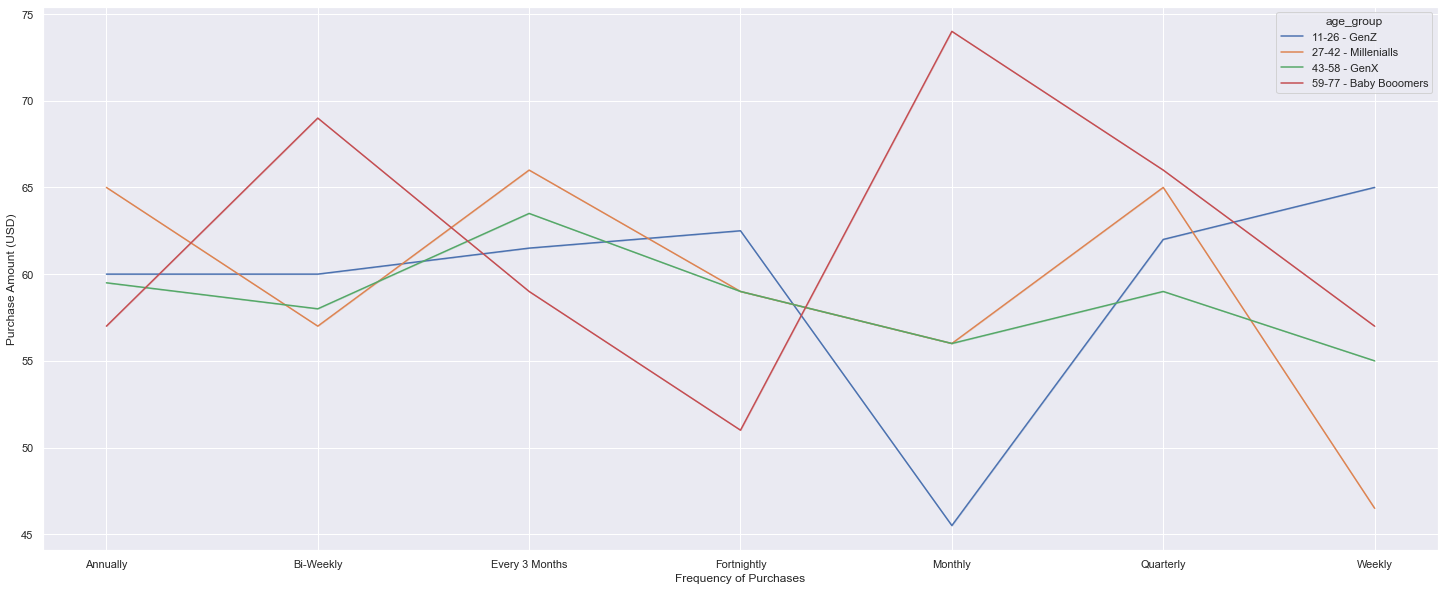

<IPython.core.display.Javascript object>

In [91]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=female,
    y="Purchase Amount (USD)",
    x="Frequency of Purchases",
    hue="age_group",
    ci=False,
estimator=np.median)


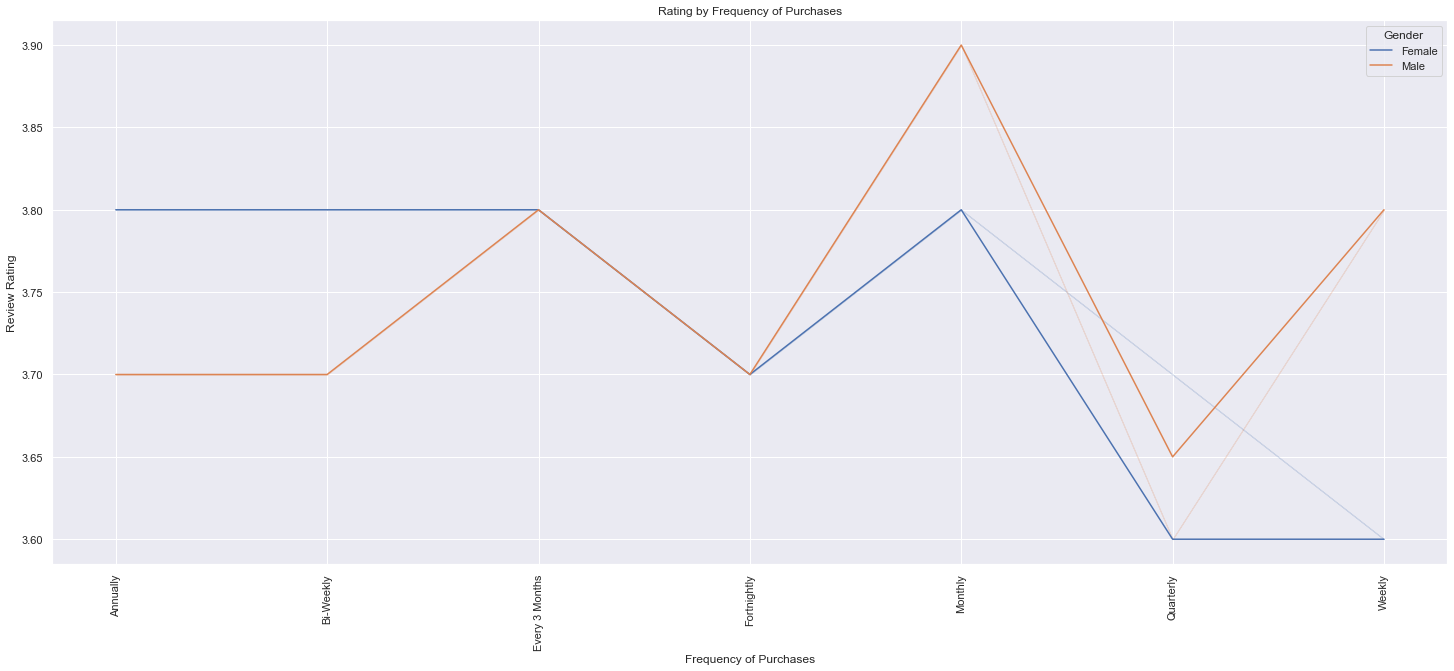

<IPython.core.display.Javascript object>

In [92]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data,
    y="Review Rating",
    x="Frequency of Purchases",
    hue="Gender",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Rating by Frequency of Purchases")
plt.show()

#### `age_group`:

<AxesSubplot:xlabel='age_group', ylabel='Purchase Amount (USD)'>

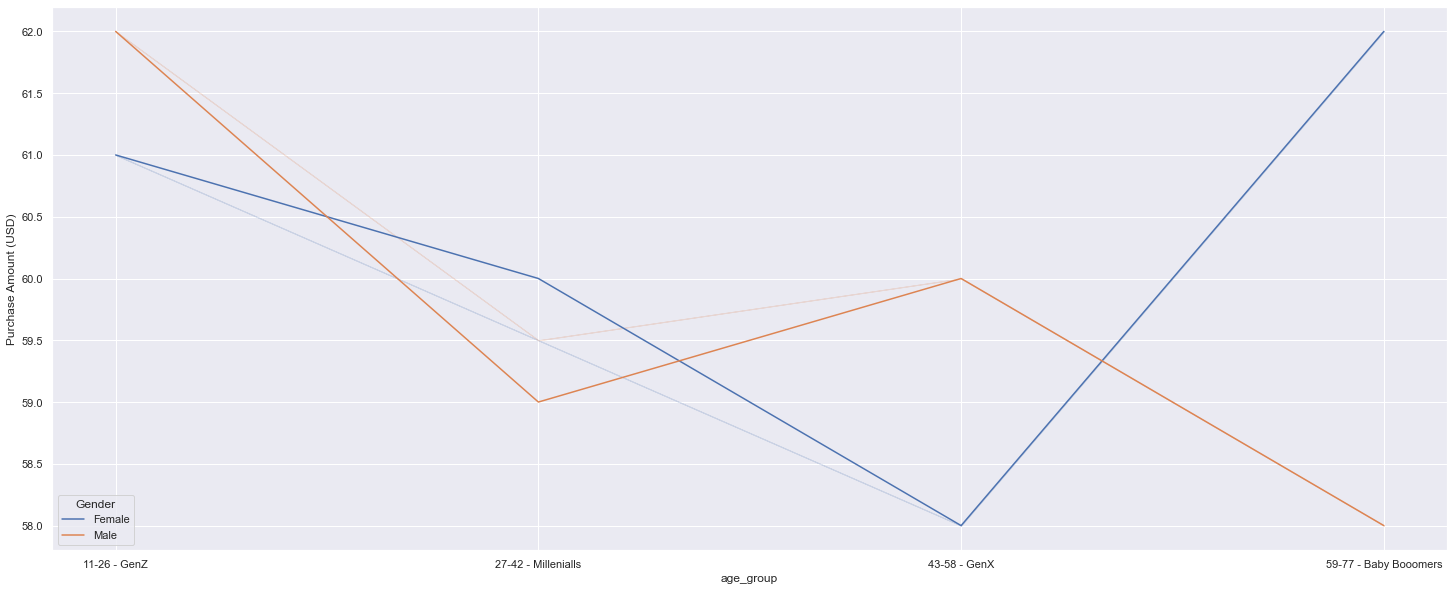

<IPython.core.display.Javascript object>

In [93]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data,
    y="Purchase Amount (USD)",
    x="age_group",
    hue="Gender",
    ci=False,
estimator=np.median)


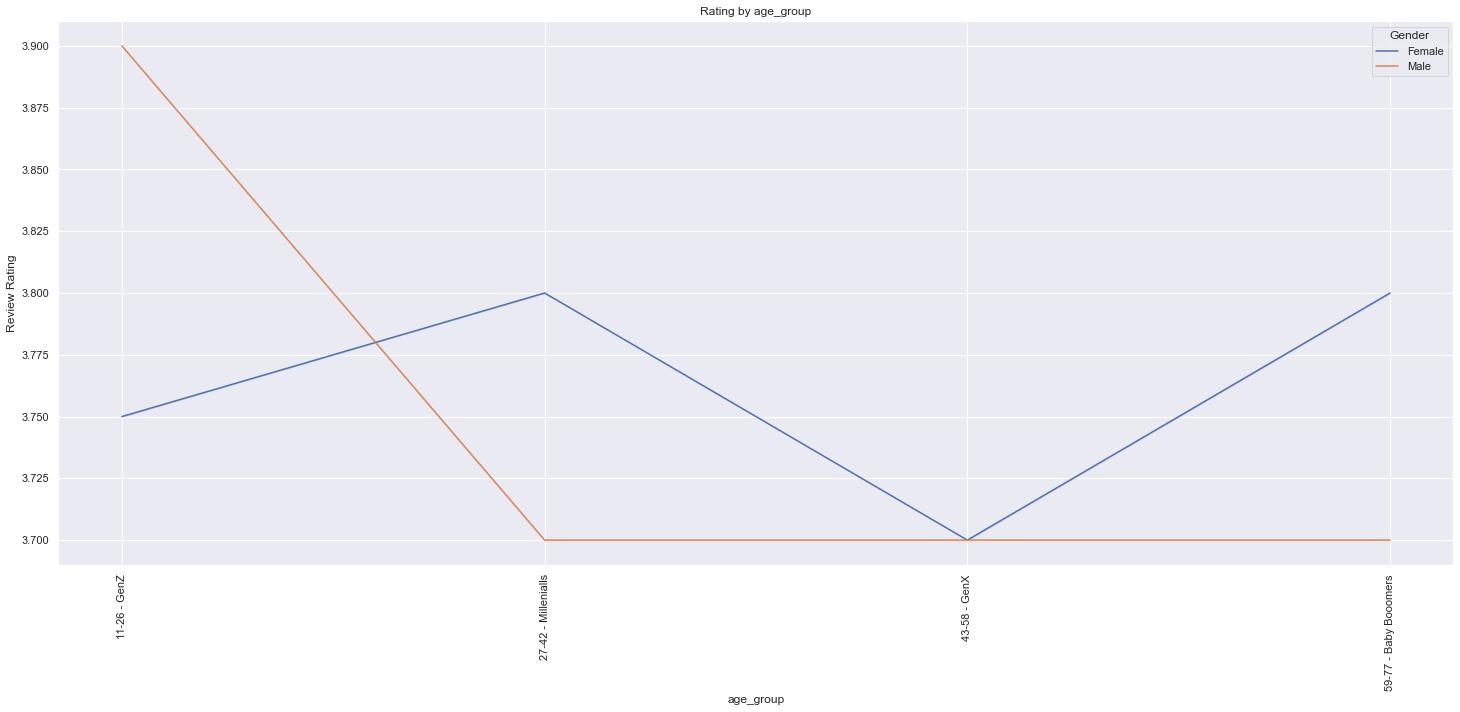

<IPython.core.display.Javascript object>

In [94]:
plt.figure(figsize=(25, 10))
sns.lineplot(
    data=data,
    y="Review Rating",
    x="age_group",
    hue="Gender",
    ci=False,
    estimator=np.median,
)
plt.xticks(rotation=90)
plt.title("Rating by age_group")
plt.show()

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- Data does not have null values
- All object variables were converted to categorical for reasons of memory optimization
- `age_group` column was created based on `Age` column
- `Promo Code Used` column was not analyzed as it is a duplication of `Discount Applied`
- There are no duplicate values in the data.
- Data was separated by Gender to analyze customer trends.


**Observations from Overall Data:**

* We have 3,900 clients


* In all cases our numerical columns's mean is very similar to the median value.  


* This means that the data follows a bell shape curve and does not possess massive outliers.  


* It is safely to say that we can use *the mean* as a measure of central tendency in all cases.


* On average the `age` of our customers is 44 years old.


* On average the `Purchase Amount (USD)` is 59.8 dollars.


* The average `Review Rating` is 3.75.


* On average customers have made 25 `Previous Purchases`


* `Gender`: 68% of our clients are male and 32% are female


* `Item Purchased`: The most purchased items are Jewerly, Blouse, and Pants.  And the least purchased items are Jeans, Gloves, Backpack. 


* However, none of the items are outliers and all `Item Purchased` seem to be spread very evenly across our data. 


* It does not seem to be an obvious problem with any of the `Item Purchased`.


* Our sales in terms of product `Category` are as follows: Clothing 44.54%, Accessories 31.79%, Footwear 15.36%, Outer wear 8.31%


* `Location`: The company has sales in all the 50 states.  The top 3 states in sales are Montana 2.46%, California 2.44%, and Idaho 2.38%.  


* The `Location` with the least sales are Rhode Island 1.62%, Kansas 1.62%, and Hawaii 1.67%.  However, the differences between the top three and top bottom `Location` is small and there is not an obvious problem with any state.


* The most popular `Size` is M with 45%, followed by L 27%, S 17% and XL 11%


* The most purchased `Color` is Olive with 4.54%, and the least purchased `Color` is Gold with 3.54%


* The 4 `Seasons` are almost equally important for the sales of the company.  Each season sales are roughly 25%.  Spring 25.62% is the top season and Summer 24.49% the bottom. 


* Only 27% of our clients have a `Subscription`


* Paypal 17.36%, Credit Card 17.21%, and Cash 17.18% are the top three `Payment Methods`.  


* Free shipping si the most popular `Shipping Type` with 17.31% the other methods are roughly 16%


* `Discount Applied` & `Promo Code Used`: 43% of sales had discount/promo code used. Values in the two columns are exactly the same, meaning a Promo Code is the only type of discount.  We eliminate one column to avoid redundancy.


* `Frequency of Purchases`: Every 3 Months   14.97%, Annually 14.67%, Quarterly 14.44%



* `age_group`: Millenialls 30.77%, GenX 30.69%, Baby Boomers 22.13%.  Gen Z  16.41% is much lower than the group



## Recommendations

* Focuss on growing market share for **Gen-Z** `age_group` 
* Promote subscriptions among the Female `Gender`. Currently there are none
* Promote discounts among the Female `Gender`. Currently there are none